#  <p> <center><mark> <font style="font-family:Calistro MT">  MS4610 Group No. 19 IDA Project: Loan Default Prediction </mark> </p>
    
---
### <p> <font color='ash'><font style="font-family:Georgia"> Table of Contents:

<p> <font color='maroon'> <font style="font-family:Constantia">
    
* [Data Summary](#datasummary) <br/>
* [Data Cleaning](#p1) <br/>
* [Exploratory Data Analysis](#p2) <br/>
    * [Univariate Analysis](#uv)<br/>
    * [Bivariate Analysis](#bv)<br/>
* [Upsampling, Splitting the Dataset & Standardization](#p3) <br/>
* [Model Building on Main dataset](#p4)<br/>
    * [Logistic Regression Model](#m1)<br/>
    * [K-Nearest Neighbours Model](#m2)<br/>
    * [Naive Bayes Model](#m3)<br/>
    * [Random Forest Classifier](#m4)<br/>
    * [Decision Trees Classifier](#m5)<br/>
    * [XGBoost Classifier](#m6)<br/>
* [Comparing Model performance using ROC & AUC](#p6roc)<br/>
* [Model Building on Upsampled dataset](#p7us)<br/>
    * [Logistic Regression Model](#m1us)<br/>
    * [K-Nearest Neighbours Model](#m2us)<br/>
    * [Naive Bayes Model](#m3us)<br/>
    * [Random Forest Classifier](#m4us)<br/>
    * [Decision Trees Classifier](#m5us)<br/>
    * [XGBoost Classifier](#m6us)<br/>
* [Comparing Model performance using ROC & AUC](#p7roc) <br/>
* [Exporting the y_pred using Random Forest Classifier](#p8) <br/>    
* [Final Conlusion](#p9) <br/>

In [1001]:
# Importing all the Libraries & Modules to be used
import pandas as pd                 
import numpy as np              
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# SciKit learn Models:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# SciKit learn Metrics:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_style("white")
pd.options.mode.chained_assignment = None
pd.options.mode.use_inf_as_na = True

<font style="font-family:Gadugi"> Reading the Dataset-

In [1002]:
# Reading and converting the dataset to Pandas DataFrame
dc = pd.read_csv('MS4610_train.csv')
df = pd.DataFrame(dc)

In [1003]:
# Check if we have correctly imported the data
df.head()

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5,Label
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0
3,4,NaN,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849,0.0
4,5,1777.648916,16316.29914,B,X,1.0,NaN,224.074728,11.218489,605.947340,3438.864083,0.0


In [1004]:
df.tail()

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5,Label
79995,79996,1470.317116,16659.49663,A,NaN,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932,0.0
79996,79997,1923.617480,14910.36890,B,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221,0.0
79997,79998,1711.147154,15962.25945,A,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018,0.0
79998,79999,1673.822523,15525.27413,B,Z,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770,0.0
79999,80000,1486.290579,16207.20250,A,Z,0.0,0.187832,182.131337,NaN,597.251640,NaN,0.0


--- 
<a name="datasummary"></a>

###  <font color='red'> <mark>  1) Data Summary: </font>



<font style="font-family:Gadugi"> Checking brief information, datatypes in our columns and all other summary

In [1005]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               80000 non-null  int64  
 1   Expense          77956 non-null  float64
 2   Income           78045 non-null  float64
 3   Loan type        77989 non-null  object 
 4   Occupation type  78141 non-null  object 
 5   Age              77986 non-null  float64
 6   Score1           78060 non-null  float64
 7   Score2           77964 non-null  float64
 8   Score3           78045 non-null  float64
 9   Score4           78028 non-null  float64
 10  Score5           78002 non-null  float64
 11  Label            76097 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 7.3+ MB


<font style="font-family:Gadugi"> We can observe that there are many missing values in the dataset.

In [1006]:
# We can observe that two of the features have object data type
df.dtypes

ID                   int64
Expense            float64
Income             float64
Loan type           object
Occupation type     object
Age                float64
Score1             float64
Score2             float64
Score3             float64
Score4             float64
Score5             float64
Label              float64
dtype: object

In [1007]:
# We get to see most of the statistical parameters of all the features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,80000.0,40000.500000,23094.155105,1.000000,20000.750000,40000.500000,60000.250000,80000.000000
Expense,77956.0,1733.993769,133.239147,1126.809192,1644.263974,1736.276720,1824.376793,2309.129903
Income,78045.0,15641.112448,1065.620737,11171.703240,14925.658150,15624.259290,16346.084990,20728.915330
Age,77986.0,0.441105,0.496522,0.000000,0.000000,0.000000,1.000000,1.000000
Score1,78060.0,0.187617,0.123509,-0.563328,0.112651,0.189877,0.265243,0.705737
Score2,77964.0,192.065584,28.558250,40.572797,173.415940,191.056193,209.727593,338.073551
Score3,78045.0,9.365450,8.760134,-28.885235,3.514901,8.883862,14.746607,50.691479
Score4,78028.0,600.397742,3.826112,581.806404,597.894759,600.095436,602.597131,619.623108
Score5,78002.0,3417.740403,64.391844,3124.413430,3374.406833,3418.793524,3461.384283,3692.731924
Label,76097.0,0.066139,0.248527,0.000000,0.000000,0.000000,0.000000,1.000000


In [1008]:
df.shape

(80000, 12)

In [1009]:
print(df.index)
print('')
print(df.columns)

RangeIndex(start=0, stop=80000, step=1)

Index(['ID', 'Expense', 'Income', 'Loan type', 'Occupation type', 'Age',
       'Score1', 'Score2', 'Score3', 'Score4', 'Score5', 'Label'],
      dtype='object')


In [1010]:
# We find the count of missing values in each feature column
df.isnull().sum(axis = 0)

ID                    0
Expense            2044
Income             1955
Loan type          2011
Occupation type    1859
Age                2014
Score1             1940
Score2             2036
Score3             1955
Score4             1972
Score5             1998
Label              3903
dtype: int64

<font style="font-family:Gadugi"> The total number of null values in each rows are shown above.

In [1011]:
df.skew(numeric_only=True)

ID         0.000000
Expense   -0.052178
Income     0.084149
Age        0.237237
Score1    -0.176985
Score2     0.187433
Score3     0.302650
Score4     0.424205
Score5    -0.051427
Label      3.491549
dtype: float64

<font style="font-family:Gadugi"> Except the Label, other columns are not very skewed.

In [1012]:
#finding unique data
df.apply(lambda x: len(x.unique()))

ID                 80000
Expense            77954
Income             78039
Loan type              3
Occupation type        4
Age                    3
Score1             78055
Score2             77963
Score3             78046
Score4             78005
Score5             77988
Label                  3
dtype: int64

---
<a name="p1"></a>

###  <mark >  2) Data Cleaning </mark>

<font style="font-family:Gadugi"> Cleaning the data by checking for any missing or infeasible data. This will make the Dataset more suitable for applying Machine Learning algorithms.

In [1013]:
# To avoid the inconvenience, lowercase all the column labels
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['id', 'expense', 'income', 'loan type', 'occupation type', 'age',
       'score1', 'score2', 'score3', 'score4', 'score5', 'label'],
      dtype='object')

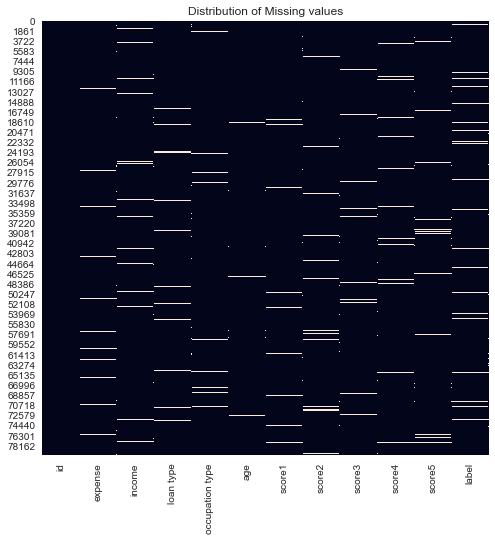

In [1014]:
# Here, we check the distribution of missing values.
# In the plot below, the white lines represent missing values while black areas have non-null values.

plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Distribution of Missing values')
plt.show()

In [1015]:
# Calculate percent of missing values in each column
col_pct_miss = []
for col in df.columns:
    percent_miss = np.mean(df[col].isnull())*100
    if percent_miss > 0:
        col_pct_miss.append([col, percent_miss])
    
col_pct_miss_df = pd.DataFrame(col_pct_miss, columns = ['column_name','% Missing']).sort_values(by = '% Missing', ascending = False)
col_pct_miss_df

,column_name,% Missing
10,label,4.87875
0,expense,2.55500
6,score2,2.54500
4,age,2.51750
2,loan type,2.51375
9,score5,2.49750
8,score4,2.46500
1,income,2.44375
7,score3,2.44375
5,score1,2.42500


In [1016]:
# Remove all the rows for which the label (y value) is missing
df= df[pd.notnull(df['label'])]

In [1017]:
# Remove all the rows with more than 3 missing cells
df["missing_col_count"] = df.apply(lambda x: x.isnull().sum(),axis=1)
print(df["missing_col_count"].value_counts())
df= df[df['missing_col_count']<3]
df.drop('missing_col_count', axis=1, inplace=True)

0    59238
1    15019
2     1727
3      106
4        7
Name: missing_col_count, dtype: int64


In [1018]:
# Regression to fill in missing values in the 'expense' column with the help of 'score5' column (Refer Report for expl.)
df1= df.copy()

df_lt= df1[pd.notnull(df1['expense']) & pd.notnull(df1['score5'])]
df_lt= df_lt[['score5','expense']]
x_lt= df_lt.score5
y_lt= df_lt['expense']
test_lt= df1[pd.isnull(df1['expense']) & pd.notnull(df1['score5'])]
test_lt= test_lt['score5']

In [1019]:
#72272 and 1868 are the sizes of x_lt and test_lt. If you get the sizes different, use your sizes instead of these numbers.
x_lt= np.array(x_lt).reshape((72272,1))
test_lt= np.array(test_lt).reshape((1868,1))

In [1020]:
lg= LinearRegression()
lg.fit(x_lt,y_lt)
pred= lg.predict(test_lt)
pred_lt= pd.Series(pred)
test_lt= df1[pd.isnull(df1['expense']) & pd.notnull(df1['score5'])]
test_lt['indexx']= test_lt.index
test_lt.reset_index(inplace=True)
test_lt['expense']= pred_lt
test_lt.set_index('indexx',inplace=True)
test_lt.drop('index',axis=1,inplace=True)
for i in test_lt.index:
    df1['expense'][i]= test_lt['expense'][i]
    
#Filling remaining missing values with median (around 40-50 missing values after regression)
df1['expense'].fillna(df1['expense'].dropna().median(),inplace=True)

In [1021]:
# Calculate percent of missing values in each column
col_pct_miss = []
for col in df.columns:
    percent_miss = np.mean(df[col].isnull())*100
    if percent_miss > 0:
        col_pct_miss.append([col, percent_miss])
    
col_pct_miss_df = pd.DataFrame(col_pct_miss, columns = ['column_name','% Missing']).sort_values(by = '% Missing', ascending = False)
col_pct_miss_df

,column_name,% Missing
0,expense,2.521583
6,score2,2.505791
2,loan type,2.489998
4,age,2.466309
9,score5,2.426827
8,score4,2.416298
1,income,2.407086
7,score3,2.401821
5,score1,2.372868
3,occupation type,2.303116


In [1022]:
# Impute missing value in the remaining numeric columns with Median 
numeric_cols = ['expense','income', 'score1', 'score2', 'score3', 'score4', 'score5']

for col in numeric_cols:
    if col in list(col_pct_miss_df.column_name) :
        med = df[col].median()
        df[col] = df[col].fillna(med)

In [1023]:
# Calculate percent of missing in each column
col_pct_miss = []
for col in df.columns:
    percent_miss = np.mean(df[col].isnull())*100
    if percent_miss > 0:
        col_pct_miss.append([col, percent_miss])
    
col_pct_miss_df = pd.DataFrame(col_pct_miss, columns = ['column_name','% Missing']).sort_values(by = '% Missing', ascending = False)
col_pct_miss_df

,column_name,% Missing
0,loan type,2.489998
2,age,2.466309
1,occupation type,2.303116


In [1024]:
# Impute missing value in categorical columns with the Mode
not_numeric_cols = ['loan type', 'occupation type', 'age', 'label']

for col in not_numeric_cols:
    if col in list(col_pct_miss_df.column_name):
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(mode)

In [1025]:
# Calculate final percent of missing in each column
col_pct_miss = []
for col in df.columns:
    percent_miss = np.mean(df[col].isnull())*100
    if percent_miss > 0:
        col_pct_miss.append([col, percent_miss])
    
col_pct_miss_df = pd.DataFrame(col_pct_miss, columns = ['column_name','% of Missing']).sort_values(by = '% of Missing', ascending = False)
col_pct_miss_df

,column_name,% of Missing


In [1026]:
# Setting ID column as the Index column since it will not affect the Model prediction
df.set_index(['id'], inplace=True)
df.head()

,expense,income,loan type,occupation type,age,score1,score2,score3,score4,score5,label
id,,,,,,,,,,,
1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0
2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0
3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0
4,1736.416471,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849,0.0
5,1777.648916,16316.29914,B,X,1.0,0.189891,224.074728,11.218489,605.947340,3438.864083,0.0


---
<a name="p2"></a>

###  <mark> 3) Exploratory Data Analysis (EDA): </mark>

<font style="font-family:Gadugi"> Let us visualize the given dataset using plots so that we can get some idea of the various patterns, if any.

In [1027]:
# Finding the number of unique values in each of the columns
df.nunique()

expense            74066
income             74149
loan type              2
occupation type        3
age                    2
score1             74175
score2             74079
score3             74159
score4             74130
score5             74126
label                  2
dtype: int64

Taking a look at the <mark> nature of Features </mark>-

    1) ID: We have already set this as our Index column. Can be safely omitted from EDA.

    2) Expense: The Customer's expense is a Numerical data of type Interval.

    3) Income: Annual Income of customers is a Numerical data of type Interval.

    4) Loan Type: Type of loan brought by the Customers. This is an Ordinal Categorical variable.

    5) Age: Age range which the Customer belongs to. This is an Ordinal Categorical variable.

    6) Score1, Score2, Score3, Score4, Score5:  These are five different metrics having numerical data points.


With this, we can broadly divide our Dataset into

    A) Numerical: ['expense', 'income', 'age', 'score1', 'score2', 'score3', 'score4', 'score5']

    B) Categorical: ['loan type', 'occupation type', 'label']

In [1028]:
# Columns having Numerical data are
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['expense', 'income', 'age', 'score1', 'score2', 'score3', 'score4',
       'score5', 'label'],
      dtype='object')

In [1029]:
numeric_features.head()

,expense,income,age,score1,score2,score3,score4,score5,label
id,,,,,,,,,
1,1830.943788,14767.28013,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0
2,1645.302546,15272.26775,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0
3,1555.026392,17482.49734,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0
4,1736.416471,16257.66493,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849,0.0
5,1777.648916,16316.29914,1.0,0.189891,224.074728,11.218489,605.947340,3438.864083,0.0


In [1030]:
# Count all negative values in the dataframe
numeric_features.agg(lambda x: sum(x < 0)).sum()

14304

In [1031]:
nf = df[['expense', 'income', 'age', 'label']]
nf.agg(lambda x: sum(x < 0)).sum()

0

<p style="font-family:Gadugi"> The <mark> <b> Value counts </b></mark> of our Categorical columns-

In [1032]:
df['age'].value_counts()

0.0    43298
1.0    32686
Name: age, dtype: int64

In [1033]:
df['loan type'].value_counts()

A    41215
B    34769
Name: loan type, dtype: int64

In [1034]:
df['occupation type'].value_counts()

Y    36697
Z    23083
X    16204
Name: occupation type, dtype: int64

In [1035]:
df['label'].value_counts()

0.0    70959
1.0     5025
Name: label, dtype: int64

<p style="font-family:Gadugi"> Coming to the <mark><b>Univariate Analysis</b></mark> using different plots:<a name="uv"></a>

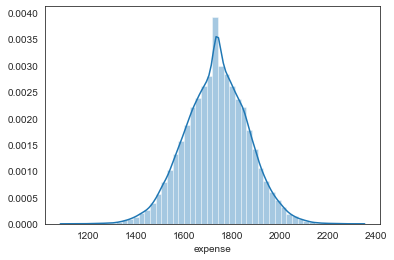

In [1036]:
sns.distplot(df['expense'], kde=True);

<p style="font-family:Gadugi"> <mark>Observation</mark>: The 'expense' column is nearly normally distributed.

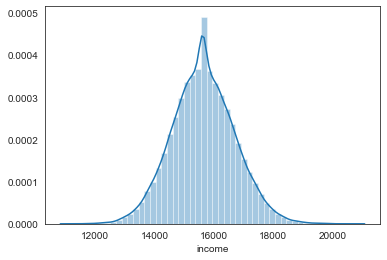

In [1037]:
sns.distplot(df['income'], kde=True);

<p style="font-family:Gadugi"> <mark>Observation</mark> The 'income' column is nearly normally distributed.

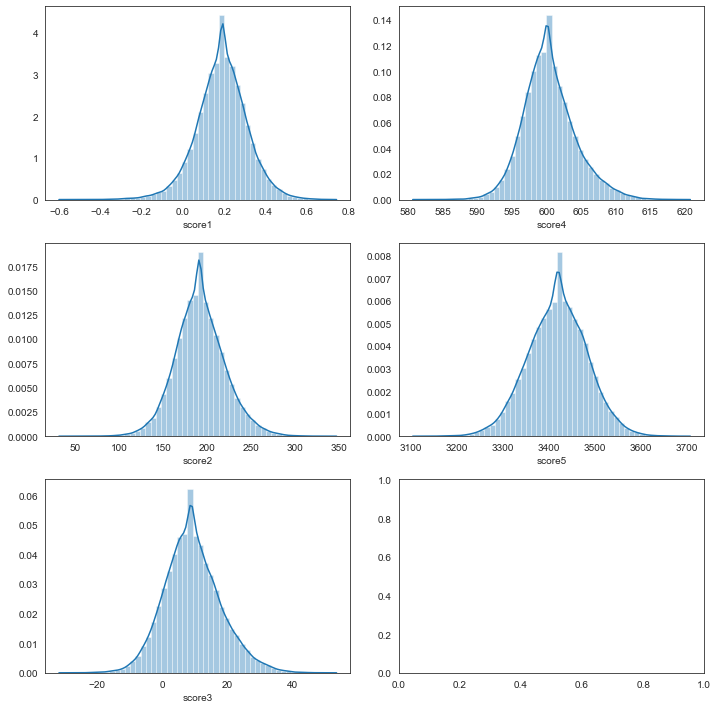

In [1038]:
fig, axes = plt.subplots(3, 2, figsize=(10,10));

sns.distplot(df['score1'], kde=True, ax=axes[0][0]);
sns.distplot(df['score2'], kde=True, ax=axes[1][0]);
sns.distplot(df['score3'], kde=True, ax=axes[2][0]);
sns.distplot(df['score4'], kde=True, ax=axes[0][1]);
sns.distplot(df['score5'], kde=True, ax=axes[1][1]);

plt.tight_layout()

<p style="font-family:Gadugi"> <mark>Observation</mark>: All the score columns are nearly normal.

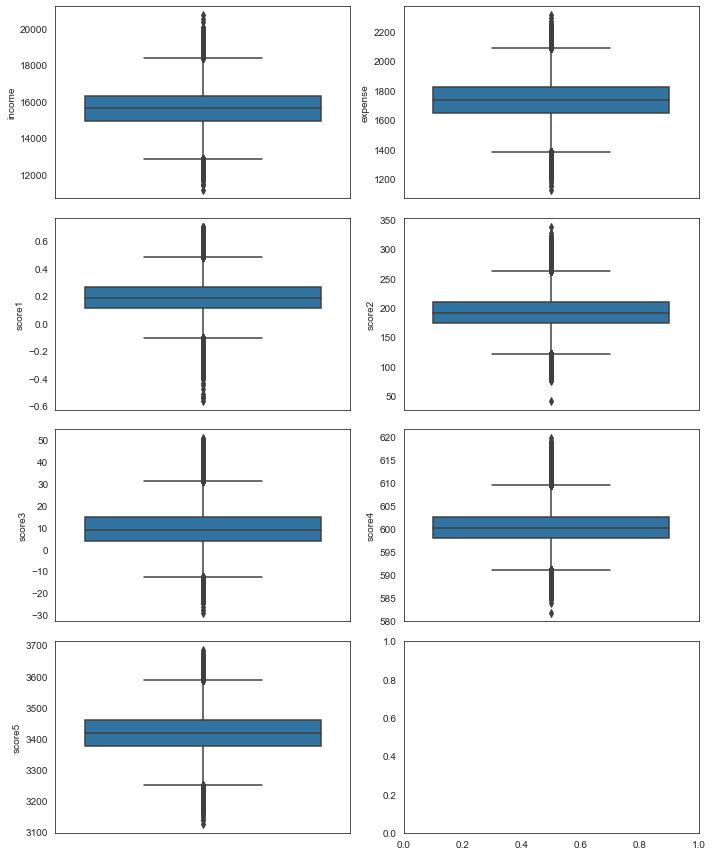

In [1039]:
# Boxplots for all the contiuous numerical features
fig, axes = plt.subplots(4, 2, figsize=(10,12));

sns.boxplot(df['income'], orient='vertical', ax=axes[0][0]);
sns.boxplot(df['expense'], orient='vertical', ax=axes[0][1]);
sns.boxplot(df['score1'], orient='vertical', ax=axes[1][0]);
sns.boxplot(df['score2'], orient='vertical', ax=axes[1][1]);
sns.boxplot(df['score3'], orient='vertical', ax=axes[2][0]);
sns.boxplot(df['score4'], orient='vertical', ax=axes[2][1]);
sns.boxplot(df['score5'], orient='vertical', ax=axes[3][0]);

plt.tight_layout()

<p style="font-family:Gadugi"> <mark>Observation</mark>: We can observe a lot of Outliers in all the features.

In [1040]:
# # Outlier Removal using the IQR Method (Not used since the model performance is affected later)
# # Income    
# Q1 = df.income.quantile(0.25)
# Q3 = df.income.quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit
# df = df[(df.income>lower_limit)&(df.income<upper_limit)]

# # Expense    
# Q1 = df.expense.quantile(0.25)
# Q3 = df.expense.quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit
# df = df[(df.expense>lower_limit)&(df.expense<upper_limit)]

# # Score1    
# Q1 = df.score1.quantile(0.25)
# Q3 = df.score1.quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit
# df = df[(df.score1>lower_limit)&(df.score1<upper_limit)]

# # Score2    
# Q1 = df.score2.quantile(0.25)
# Q3 = df.score2.quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit
# df = df[(df.score2>lower_limit)&(df.score2<upper_limit)]

# # Score3    
# Q1 = df.score3.quantile(0.25)
# Q3 = df.score3.quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit
# df = df[(df.score3>lower_limit)&(df.score3<upper_limit)]

# # Score4    
# Q1 = df.score4.quantile(0.25)
# Q3 = df.score4.quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit
# df = df[(df.score4>lower_limit)&(df.score4<upper_limit)]

# # Score5    
# Q1 = df.score5.quantile(0.25)
# Q3 = df.score5.quantile(0.75)
# IQR = Q3 - Q1

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 + 1.5*IQR
# lower_limit, upper_limit
# df = df[(df.score5>lower_limit)&(df.score5<upper_limit)]

In [1041]:
# fig, axes = plt.subplots(4, 2, figsize=(10,12));

# sns.boxplot(df['income'], orient='vertical', ax=axes[0][0]);
# sns.boxplot(df['expense'], orient='vertical', ax=axes[0][1]);
# sns.boxplot(df['score1'], orient='vertical', ax=axes[1][0]);
# sns.boxplot(df['score2'], orient='vertical', ax=axes[1][1]);
# sns.boxplot(df['score3'], orient='vertical', ax=axes[2][0]);
# sns.boxplot(df['score4'], orient='vertical', ax=axes[2][1]);
# sns.boxplot(df['score5'], orient='vertical', ax=axes[3][0]);

# plt.tight_layout()

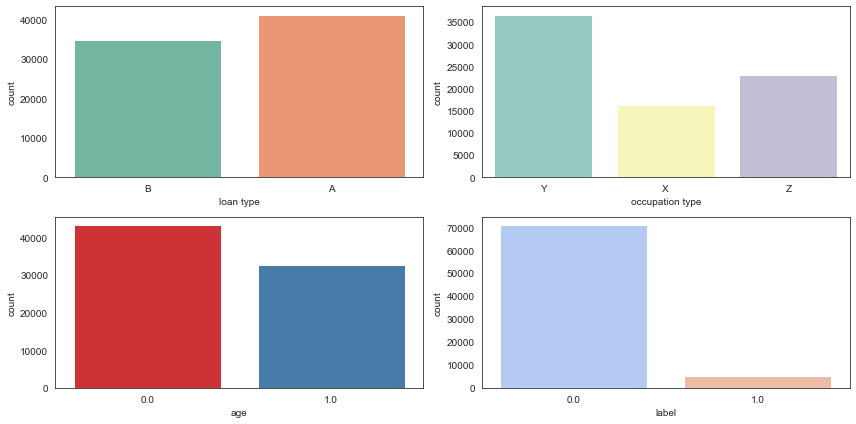

In [1042]:
# Checking countplots of all teh categorical features
fig, axes = plt.subplots(2, 2, figsize=(12,6));

sns.countplot(df['loan type'], palette='Set2', ax=axes[0][0]);
sns.countplot(df['occupation type'], palette='Set3', ax=axes[0][1]);
sns.countplot(df['age'], palette='Set1', ax=axes[1][0]);
sns.countplot(df['label'], palette='coolwarm', ax=axes[1][1]);

plt.tight_layout();

<p style="font-family:Gadugi"> <mark>Observation</mark>:<br>
  i)    The number of customers who default on the loan are relatively very large. <br/>
  ii)   We have more number of customers aged below 50. <br/>
  iii)  More number of customers in our dataset have taken the Loan 'A'.<br/>
  iv)   The highest number of customers have occupation type 'Y'.
    

<p style="font-family:Gadugi"> Coming to the <mark><b>Bivariate Analysis</b></mark> using different plots. We plot two different variables against each other. <a name="bv"></a>

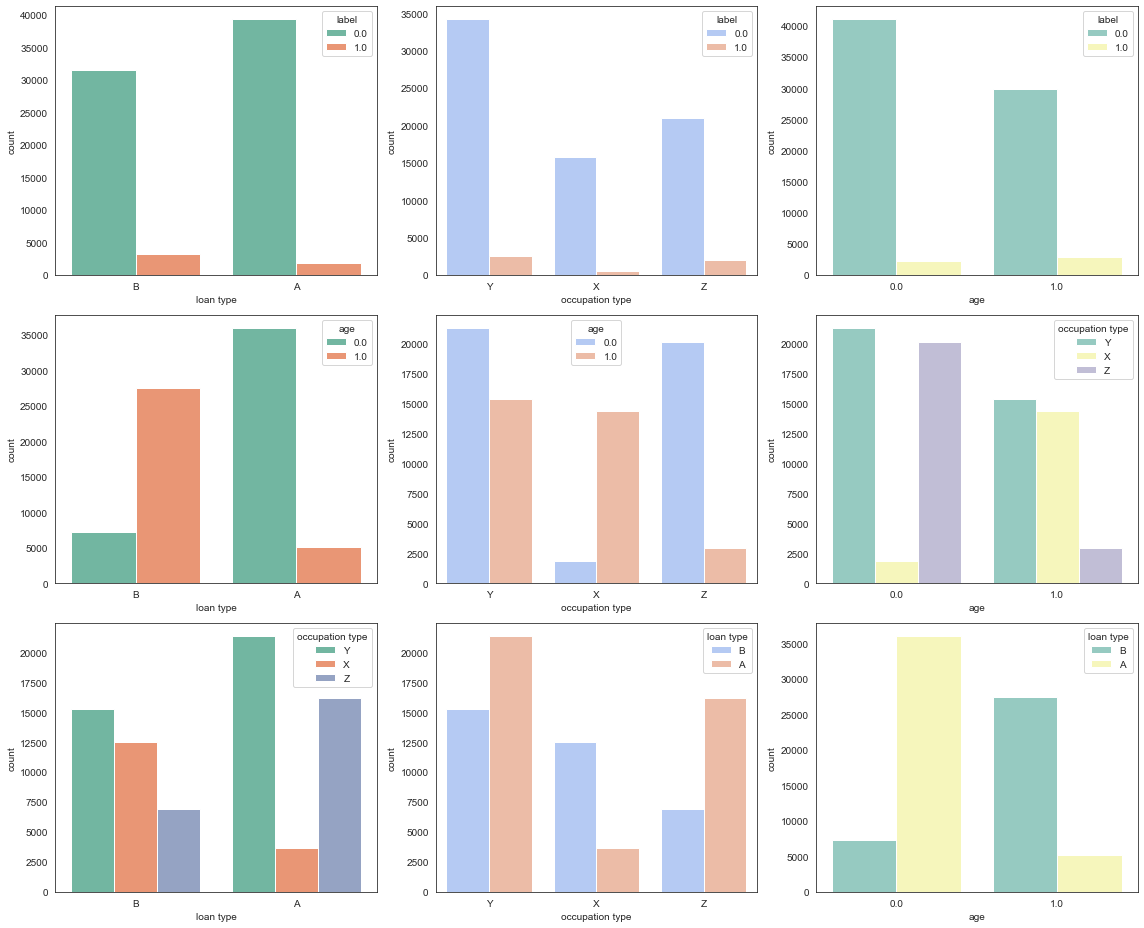

In [1043]:
# Countplots with categorical variables hued against each other 
fig, axes = plt.subplots(3, 3, figsize=(16,13));

sns.countplot(df['loan type'], hue=df['label'], palette='Set2', ax=axes[0][0]);
sns.countplot(df['loan type'], hue=df['age'], palette='Set2', ax=axes[1][0]);
sns.countplot(df['loan type'], hue=df['occupation type'], palette='Set2', ax=axes[2][0]);

sns.countplot(df['occupation type'], hue=df['label'], palette='coolwarm', ax=axes[0][1]);
sns.countplot(df['occupation type'], hue=df['age'], palette='coolwarm', ax=axes[1][1]);
sns.countplot(df['occupation type'], hue=df['loan type'], palette='coolwarm', ax=axes[2][1]);

sns.countplot(df['age'], hue=df['label'], palette='Set3', ax=axes[0][2]);
sns.countplot(df['age'], hue=df['occupation type'], palette='Set3', ax=axes[1][2]);
sns.countplot(df['age'], hue=df['loan type'], palette='Set3', ax=axes[2][2]);

plt.tight_layout()

<p style="font-family:Gadugi"> <mark>Observation</mark>:<br/>
  i)    The Customers aged above 50 seem to prefer loan 'B' while for loan 'A', we have more number of the customers aged below 50. <br/>
  ii)   For both the types of loans, the highest number of customers have occupation type 'Y'. <br/>
  iii)  Customers with occupation types 'Y' and 'Z' have taken loan 'B' more than the loan 'A'. <br/>
  iv)   Occupation type 'X' has more number of people aged above 50 while for types 'Y' and 'Z', it's the other way round.<br/>
  v)    The Loan 'A' has relatively lesser deafult and relatively greater non-default loans than the loan type 'B'.

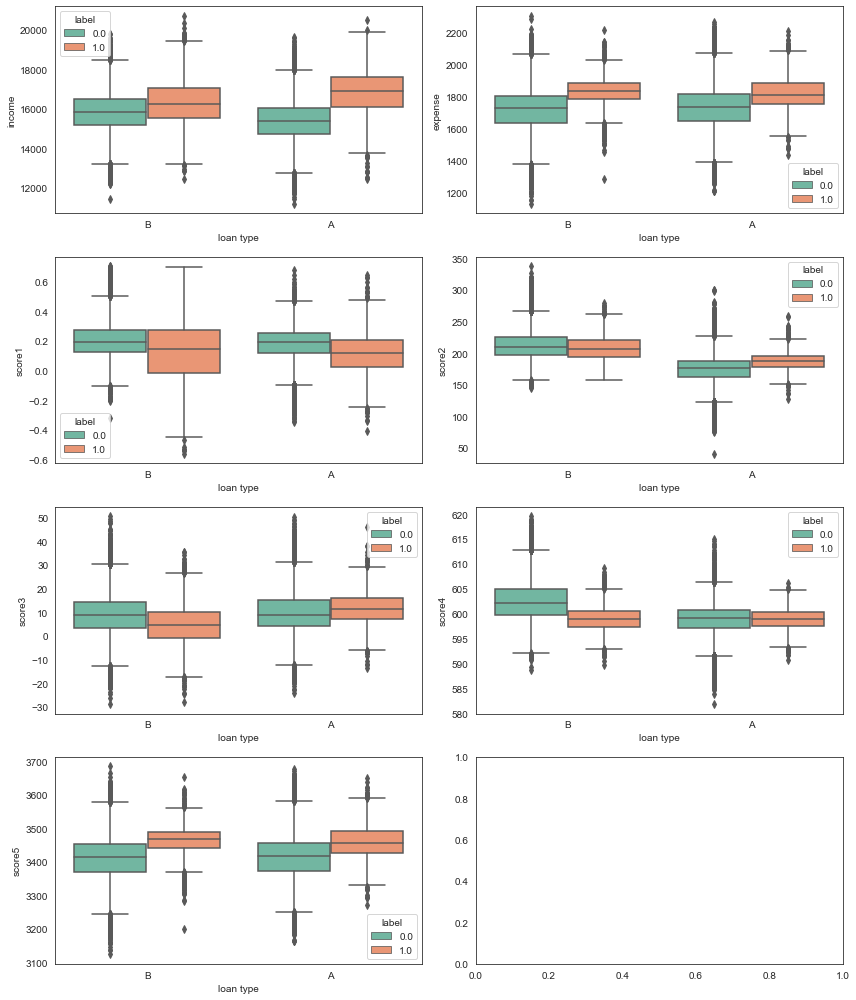

In [1044]:
# Boxplots with the categorical feature 'loan type' on X-axis against all other continuous features on the Y-axis
fig, axes = plt.subplots(4, 2, figsize=(12,14));

sns.boxplot(x="loan type", y="income", hue="label", data=df, palette="Set2", ax=axes[0][0]);
sns.boxplot(x="loan type", y="expense", hue="label", data=df, palette="Set2", ax=axes[0][1]);
sns.boxplot(x="loan type", y="score1", hue="label", data=df, palette="Set2", ax=axes[1][0]);
sns.boxplot(x="loan type", y="score2", hue="label", data=df, palette="Set2", ax=axes[1][1]);
sns.boxplot(x="loan type", y="score3", hue="label", data=df, palette="Set2", ax=axes[2][0]);
sns.boxplot(x="loan type", y="score4", hue="label", data=df, palette="Set2", ax=axes[2][1]);
sns.boxplot(x="loan type", y="score5", hue="label", data=df, palette="Set2", ax=axes[3][0]);

plt.tight_layout()

<p style="font-family:Gadugi"> <mark>Observation</mark>:<br/>
  i)    For both the types of loans, the median of annual income of the customers with default loan is higher than the ones with non-default loans. <br/>
  ii)   For both the types of loans, the median of expenses of the customers with default loan are greater than the ones with non-default loans. <br/>
  iii)  For both the types of loans, the median of score1 of the customers with default loan is lesser than the ones with non-default loans. <br/>
  iv)   For both the types of loans, the median of score4 & score5 of the customers with default loan is higher than the ones with non-default loans. <br/>
  v)    For Loan type 'A', the median of score2 & score3 is higher for deault loan customers than the non-default ones. While for the Loan type 'B', it's the opposite case.

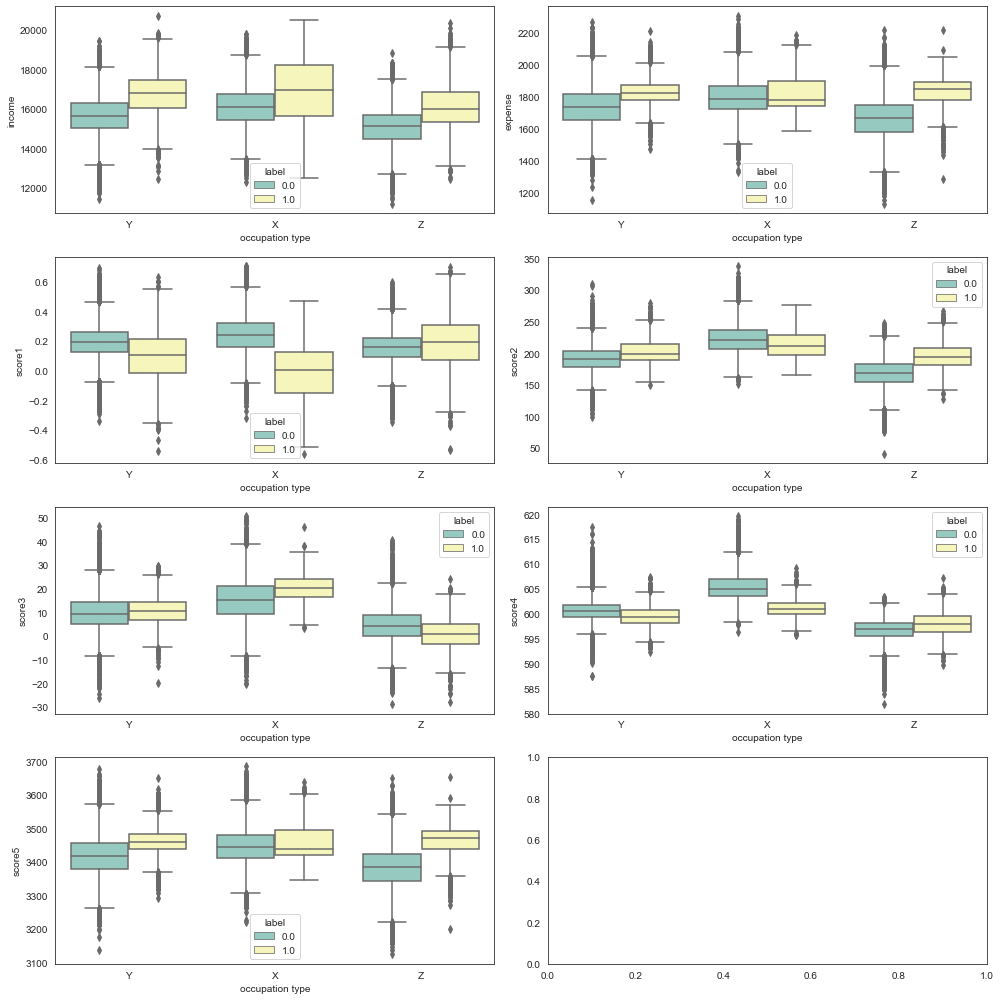

In [1045]:
# Boxplots with the categorical feature 'occupation type' on X-axis against all other continuous features on the Y-axis
fig, axes = plt.subplots(4, 2, figsize=(14,14));

sns.boxplot(x="occupation type", y="income", hue="label", data=df, palette="Set3", ax=axes[0][0]);
sns.boxplot(x="occupation type", y="expense", hue="label", data=df, palette="Set3", ax=axes[0][1]);
sns.boxplot(x="occupation type", y="score1", hue="label", data=df, palette="Set3", ax=axes[1][0]);
sns.boxplot(x="occupation type", y="score2", hue="label", data=df, palette="Set3", ax=axes[1][1]);
sns.boxplot(x="occupation type", y="score3", hue="label", data=df, palette="Set3", ax=axes[2][0]);
sns.boxplot(x="occupation type", y="score4", hue="label", data=df, palette="Set3", ax=axes[2][1]);
sns.boxplot(x="occupation type", y="score5", hue="label", data=df, palette="Set3", ax=axes[3][0]);

plt.tight_layout()

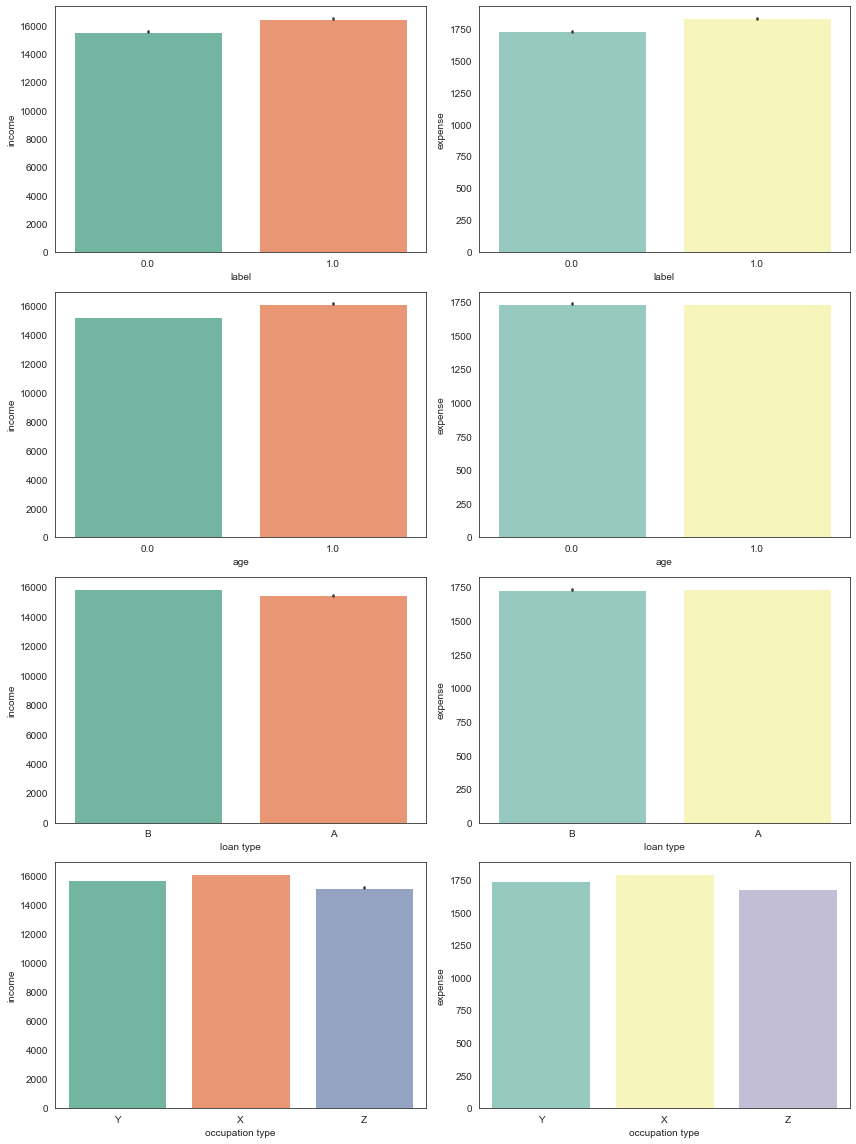

In [1046]:
# Barplots showing average values of all continuous variables with categorical features on the X-axis
fig, axes = plt.subplots(4, 2, figsize=(12,16));

sns.barplot(x="label", y="income", data=df, palette="Set2", ax=axes[0][0]);
sns.barplot(x="label", y="expense", data=df, palette="Set3", ax=axes[0][1]);
sns.barplot(x="age", y="income", data=df, palette="Set2", ax=axes[1][0]);
sns.barplot(x="age", y="expense", data=df, palette="Set3", ax=axes[1][1]);
sns.barplot(x="loan type", y="income", data=df, palette="Set2", ax=axes[2][0]);
sns.barplot(x="loan type", y="expense", data=df, palette="Set3", ax=axes[2][1]);
sns.barplot(x="occupation type", y="income", data=df, palette="Set2", ax=axes[3][0]);
sns.barplot(x="occupation type", y="expense", data=df, palette="Set3", ax=axes[3][1]);

plt.tight_layout()

<p style="font-family:Gadugi"> <mark>Observation</mark>:<br/>
  i)    The average annual income of the customers with default loan is in general higher than those with non-default loans. <br/>
  ii)   The average expenses of the customers with default loan are in general greater than the ones with non-default loans. <br/>
  iii)  The average annual income of the customers aged above 50 is greater than the ones aged below 50.<br/>
  iv)   The customers aged above as well below 50 have similar average level of expenses. <br/>
  v)    The customers with Loan type 'B' have higher average annual income than those with the Loan type 'A'. <br/>
  vi)   The customers from occupation type 'X' have the highest level of average annual income as well as the expenses, followed by type 'Y'. <br/>  

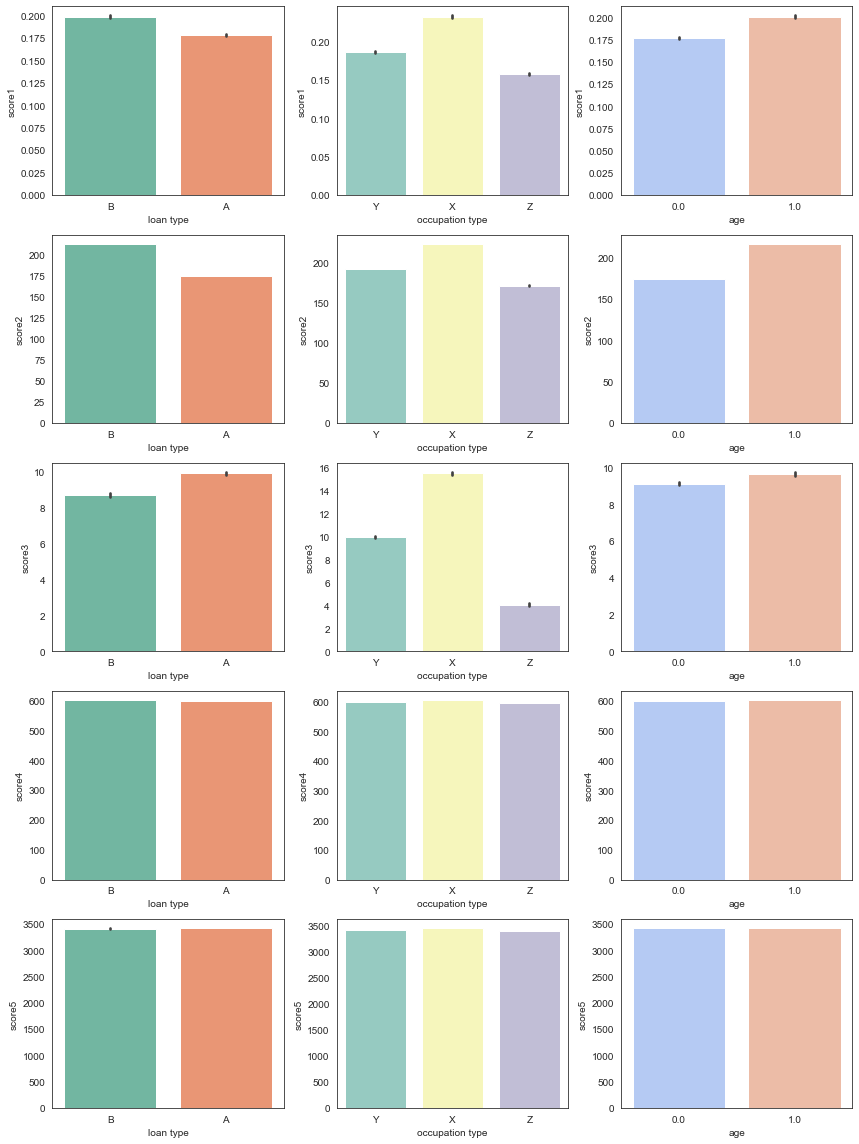

In [1047]:
# All the three categorical features plotted against score1 to score5
fig, axes = plt.subplots(5, 3, figsize=(12,16));

sns.barplot(x="loan type", y="score1", data=df, palette="Set2", ax=axes[0][0]);
sns.barplot(x="loan type", y="score2", data=df, palette="Set2", ax=axes[1][0]);
sns.barplot(x="loan type", y="score3", data=df, palette="Set2", ax=axes[2][0]);
sns.barplot(x="loan type", y="score4", data=df, palette="Set2", ax=axes[3][0]);
sns.barplot(x="loan type", y="score5", data=df, palette="Set2", ax=axes[4][0]);

sns.barplot(x="occupation type", y="score1", data=df, palette="Set3", ax=axes[0][1]);
sns.barplot(x="occupation type", y="score2", data=df, palette="Set3", ax=axes[1][1]);
sns.barplot(x="occupation type", y="score3", data=df, palette="Set3", ax=axes[2][1]);
sns.barplot(x="occupation type", y="score4", data=df, palette="Set3", ax=axes[3][1]);
sns.barplot(x="occupation type", y="score5", data=df, palette="Set3", ax=axes[4][1]);

sns.barplot(x="age", y="score1", data=df, palette="coolwarm", ax=axes[0][2]);
sns.barplot(x="age", y="score2", data=df, palette="coolwarm", ax=axes[1][2]);
sns.barplot(x="age", y="score3", data=df, palette="coolwarm", ax=axes[2][2]);
sns.barplot(x="age", y="score4", data=df, palette="coolwarm", ax=axes[3][2]);
sns.barplot(x="age", y="score5", data=df, palette="coolwarm", ax=axes[4][2]);


plt.tight_layout();

<p style="font-family:Gadugi"> <mark>Observation</mark>:<br/>
  i)    The customers with occupation type 'X' have the highest average value for all score1 to score5. <br/>
  ii)   The average score1, score2, score3 values are higher for customers with Loan type 'B' than those with the Loan type 'A'. <br/>
  iii)  The average score1, score2, score3 values are higher for customers aged above 50 than those aged below 50. <br/>
  iv)   The average score4 and score5 values are similar for loan 'A' as well as loan 'B' . <br/>

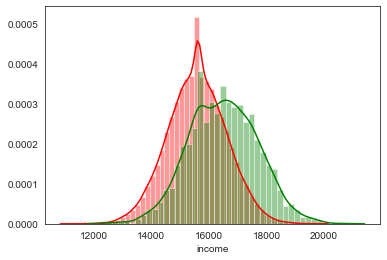

In [1048]:
sns.distplot( df[df['label']== 0.0]['income'], color = 'r');
sns.distplot( df[df['label'] == 1.0]['income'], color = 'g');

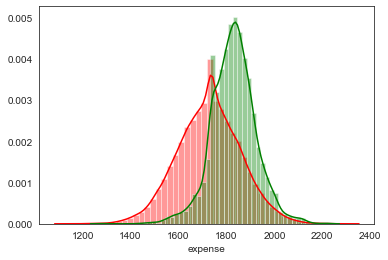

In [1049]:
sns.distplot( df[df['label']== 0.0]['expense'], color = 'r');
sns.distplot( df[df['label'] == 1.0]['expense'], color = 'g');

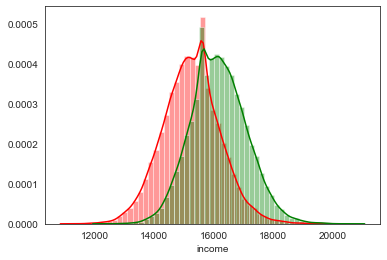

In [1050]:
sns.distplot( df[df['age']== 0.0]['income'], color = 'r');
sns.distplot( df[df['age'] == 1.0]['income'], color = 'g');

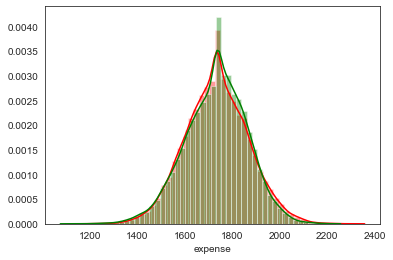

In [1051]:
sns.distplot( df[df['age']== 0.0]['expense'], color = 'r');
sns.distplot( df[df['age'] == 1.0]['expense'], color = 'g');

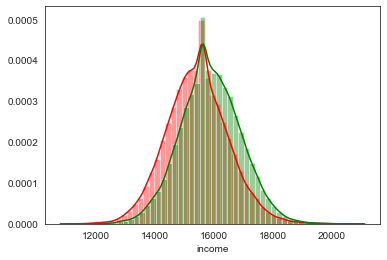

In [1052]:
sns.distplot( df[df['loan type']== 'A']['income'], color = 'r');
sns.distplot( df[df['loan type'] == 'B']['income'], color = 'g');

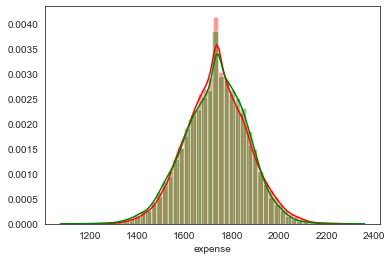

In [1053]:
sns.distplot( df[df['loan type']== 'A']['expense'], color = 'r');
sns.distplot( df[df['loan type'] == 'B']['expense'], color = 'g');

<p style="font-family:Gadugi"> All the above Distribution plots verify the observations depicted from the earlier plots.

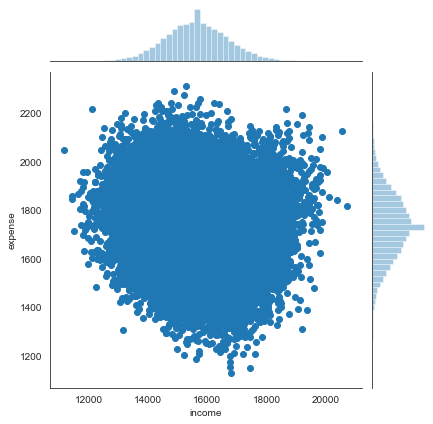

In [1054]:
sns.jointplot(x='income',y='expense',data=df,kind='scatter');

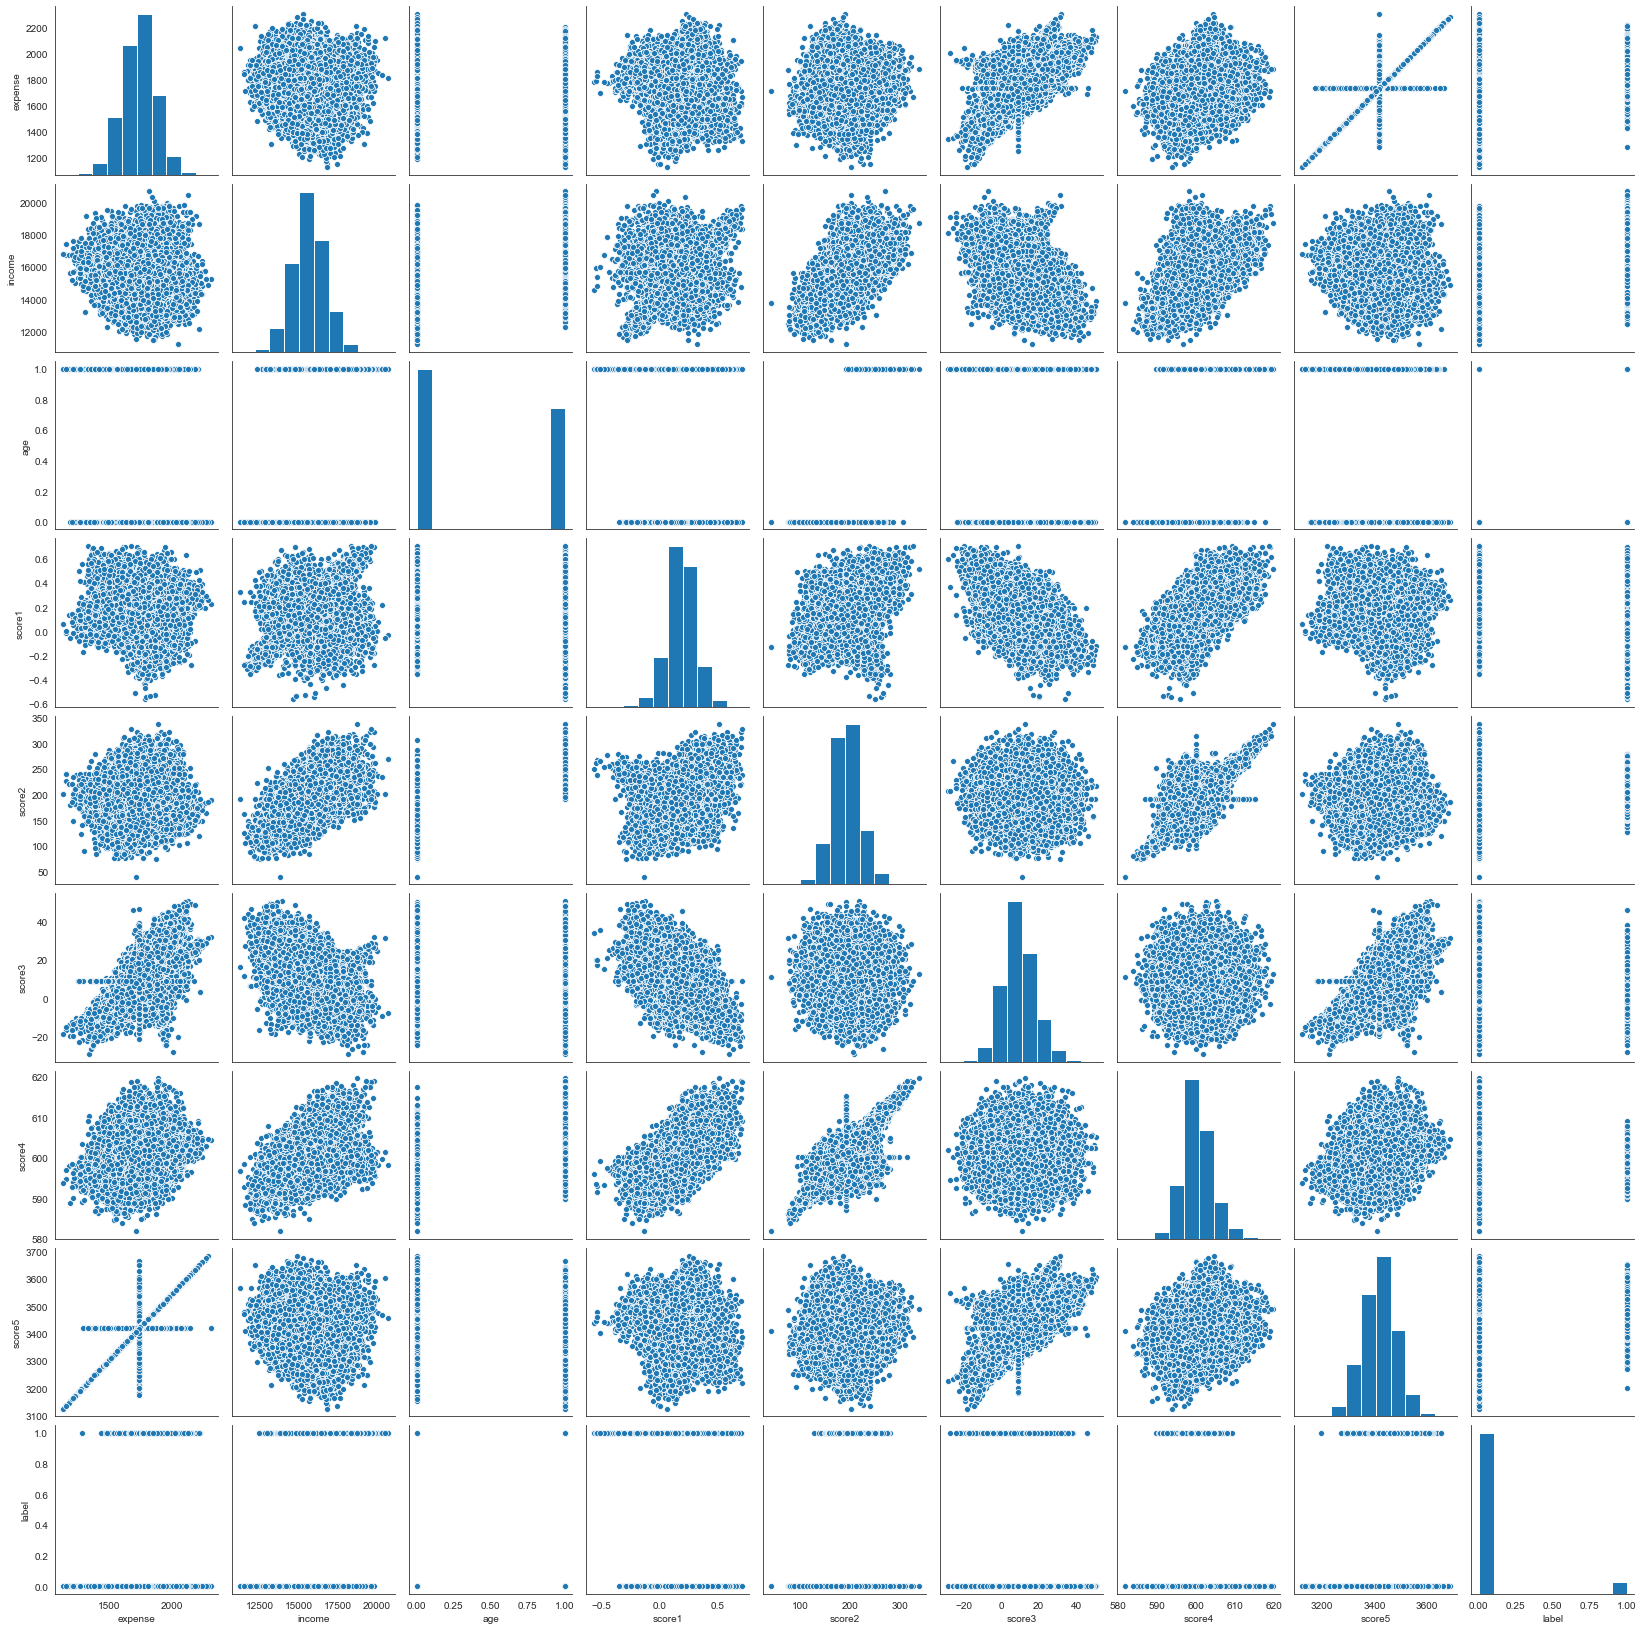

In [1055]:
# A pairplot to get a broader perspective
sns.pairplot(df);

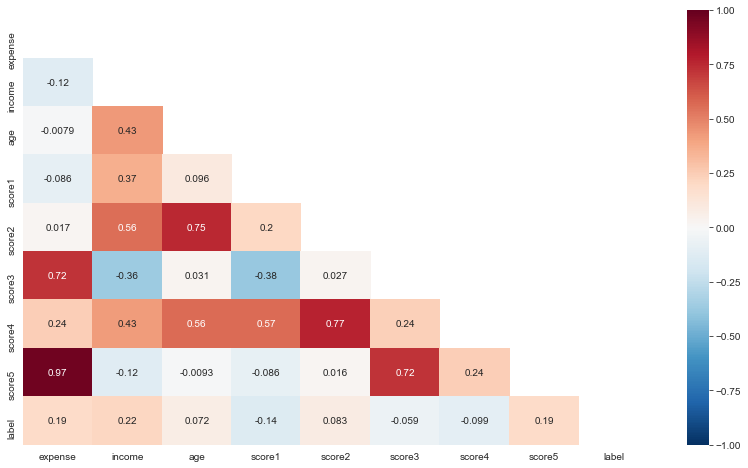

In [1056]:
# The Correlation Matrix
plt.figure(figsize=(14,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1,center=0, mask=mask, cmap='RdBu_r');

<p style="font-family:Gadugi"> <mark>Observation</mark>:<br/>
  i)    The feature score4 has high correlation with 4 other features and hence shall be reomved before modelling. <br/>
  ii)   The faeature score5 has very strong correlation with the 'expense' feature as well as score 3 and hence shall be reomved before modelling..  <br/>

In [1057]:
# We drop two features: score4 and score5
df.drop(['score4', 'score5'], axis=1, inplace=True)
df.columns

Index(['expense', 'income', 'loan type', 'occupation type', 'age', 'score1',
       'score2', 'score3', 'label'],
      dtype='object')

In [1058]:
# Current value counts of our target column 'label'
df['label'].value_counts()

0.0    70959
1.0     5025
Name: label, dtype: int64

<p style="font-family:Gadugi">We can observe the imbalance in our labels. This will be dealt with using 'Upsampling' later.

---
<a name="p3"></a>

###  <mark> 4) Upsampling, Splitting the Dataset & Standardization </mark>
---
<p style="font-family:Gadugi">We will split our Dataset into a Training data and a Test data set, in the ratio of 80:20. The 'stratify' parameter of train_test_split function will be used to get the same class distribution across our train and the test data set.

<p style="font-family:Gadugi">Before that, we will convert our categorical features 'loan type' & 'occupation type' with object values into numerical values using <mark> <b>'Dummy Coding' </b></mark>.

In [1059]:
# Dummy coding applied on the 'occupation type' feature
dummies = pd.get_dummies(df['occupation type'])
df = df.join(dummies)
df.drop('occupation type', axis=1, inplace=True)
df.head()

,expense,income,loan type,age,score1,score2,score3,label,X,Y,Z
id,,,,,,,,,,,
1,1830.943788,14767.28013,B,1.0,0.016885,205.196182,22.521523,0.0,0,1,0
2,1645.302546,15272.26775,B,0.0,0.240375,194.266317,5.349117,0.0,0,1,0
3,1555.026392,17482.49734,A,0.0,0.213921,183.529871,-1.054954,0.0,0,1,0
4,1736.416471,16257.66493,A,0.0,0.303909,191.228965,6.971750,0.0,0,1,0
5,1777.648916,16316.29914,B,1.0,0.189891,224.074728,11.218489,0.0,1,0,0


In [1060]:
# Dummy coding applied on the 'loan type' feature
dummies = pd.get_dummies(df['loan type'])
df = df.join(dummies)
df.drop('loan type', axis=1, inplace=True)
df.head()

,expense,income,age,score1,score2,score3,label,X,Y,Z,A,B
id,,,,,,,,,,,,
1,1830.943788,14767.28013,1.0,0.016885,205.196182,22.521523,0.0,0,1,0,0,1
2,1645.302546,15272.26775,0.0,0.240375,194.266317,5.349117,0.0,0,1,0,0,1
3,1555.026392,17482.49734,0.0,0.213921,183.529871,-1.054954,0.0,0,1,0,1,0
4,1736.416471,16257.66493,0.0,0.303909,191.228965,6.971750,0.0,0,1,0,1,0
5,1777.648916,16316.29914,1.0,0.189891,224.074728,11.218489,0.0,1,0,0,0,1


<p style="font-family:Gadugi">Also, as we have imbalance in our dataset, we will perfrom <mark><b>'Upsampling'</b></mark>

In [1061]:
df_maj = df[df['label']==0.0]
df_min = df[df['label']==1.0]
df_upsample_min = resample(df_min, replace=True, random_state=12, n_samples=70959)
df_upsample = pd.concat([df_maj, df_upsample_min])

In [1062]:
# Checking the value counts of 'label' in the upsampled dataset
df_upsample['label'].value_counts()

1.0    70959
0.0    70959
Name: label, dtype: int64

<p style="font-family:Gadugi">Now we do the <mark><b>'Splitting'</b></mark> on both the main as well as the upsampled dataset.

In [1063]:
# Let's first separate out our output column 'label' from df
data_X = df.loc[:, df.columns != "label"]
data_Y = df[["label"]]
X_train, X_test ,y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20, stratify=data_Y, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60787, 11)
(15197, 11)
(60787, 1)
(15197, 1)


In [1064]:
# Let's also separate out our output column 'label' from df_upsampled
X_upsampled = df_upsample.drop(['label'],axis=1)
Y_upsampled = df_upsample[['label']]
X_upsampled_train, X_upsampled_test, Y_upsampled_train, Y_upsampled_test = train_test_split(X_upsampled, Y_upsampled, test_size=0.20, stratify=Y_upsampled, random_state=3)
print(X_upsampled_train.shape)
print(X_upsampled_test.shape)
print(Y_upsampled_train.shape)
print(Y_upsampled_test.shape)

(113534, 11)
(28384, 11)
(113534, 1)
(28384, 1)


<p style="font-family:Gadugi">Now let's perform <mark><b>'Standardization'</b></mark> on our Dataset to increase our learning performance.
A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

In [1065]:
# Main Data
ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# Upsampled Data
ss = StandardScaler().fit(X_upsampled_train)
X_upsampled_train = ss.transform(X_upsampled_train)
X_upsampled_test = ss.transform(X_upsampled_test)

---
<a name="p4"></a>

### <mark color='blue'> 5) Model Building </mark>

<p style="font-family:Gadugi"> Now we have reached the 'Model Building'. We will be using 6 different Classifier Models viz.
    
    i)   Logistic Regression
    ii)  K-Nearest Neighbours (KNN)
    iii) Naive Bayes 
    iv)  Random Forest
    v)   Decision Trees
    vi)  XGBoost
    
<p style="font-family:Gadugi"> The performance of these models will be assessed using various metrics such as 'Accuracy', 'F1 score', 'ROC_AUC Curve' etc.

<p style="font-family:Gadugi"> <font color='brown'> We will first start with our Main data (Without Upsampling). The same models will be applied later on the Upsampled dataset.
<a name="m1"></a>

#### <p style="font-family:Gadugi">  <font color='green'> M1) Logistic Regression Model

In [1066]:
logmodel = LogisticRegression();
logmodel.fit(X_train, y_train);

C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<p style="font-family:Gadugi">Prediction and Evaluation:

In [1067]:
logmodel.score(X_train, y_train)

0.9566848174774212

In [1068]:
logmodel.score(X_test, y_test)

0.9568993880371126

In [1069]:
logmodel_predicttr = logmodel.predict(X_train)

In [1070]:
logmodel_predictts = logmodel.predict(X_test)

<p style="font-family:Gadugi">Assessment of the LR Model:

The Report for Logistic Regression Model is: 



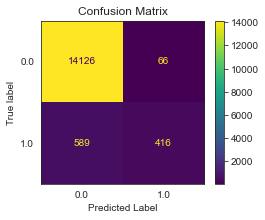

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     14192
         1.0       0.86      0.41      0.56      1005

    accuracy                           0.96     15197
   macro avg       0.91      0.70      0.77     15197
weighted avg       0.95      0.96      0.95     15197

Accuracy Score on Training data for Logistic Regression is: 95.66848174774212
Accuracy Score on Test data for Logistic Regression is: 95.68993880371126
F1 Score  for Logistic Regression is: 94.97097241271895


In [1071]:
print('The Report for Logistic Regression Model is: \n')
matrix = plot_confusion_matrix(logmodel, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(y_test,logmodel_predictts))

print("Accuracy Score on Training data for Logistic Regression is: {}".format(accuracy_score(y_train, logmodel_predicttr) * 100));
print("Accuracy Score on Test data for Logistic Regression is: {}".format(accuracy_score(y_test, logmodel_predictts) * 100));
print("F1 Score  for Logistic Regression is: {}".format(f1_score(y_test, logmodel_predictts, average="weighted") * 100));

<p style="font-family:Gadugi"> <mark>Observations from LR Model</mark>:

<p style="font-family:Gadugi">
1.   Accuracy:  A good accuracy score of 95.69% on the Test data. <br/>
2.   Recall: A recall value of 94.97%, which means among the total number of customers who default the loan, our model has predicted 0.94 of them correctly. <br/>
3.   Precision: A Precision value of 96%, which means out of customers who we predicted to default on the loan, only 96% of them actually default the loan.
<a name="m2"></a>

####  <p style="font-family:Gadugi"> <font color='green'>  M2) K-Nearest Neighbours (KNN) Model

In [1072]:
knn_model = KNeighborsClassifier(n_neighbors=15)

In [1073]:
knn_model.fit(X_train,y_train)

<ipython-input-1073-0cd16f62cdb5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=15)

<p style="font-family:Gadugi">Prediction and Evaluation:

In [1074]:
knn_model.score(X_train, y_train)

0.9806373073189991

In [1075]:
knn_model.score(X_test, y_test)

0.9807856813844837

In [1076]:
knn_predicttr = knn_model.predict(X_train)

In [1077]:
knn_predictts = knn_model.predict(X_test)

<p style="font-family:Gadugi">Assessment of the KNN Model:

The Report for KNN Model is: 



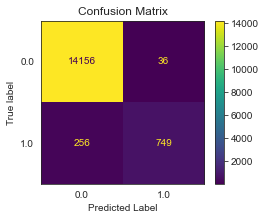

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14192
         1.0       0.95      0.75      0.84      1005

    accuracy                           0.98     15197
   macro avg       0.97      0.87      0.91     15197
weighted avg       0.98      0.98      0.98     15197

Accuracy Score on Training data for KNN Classifier is: 98.06373073189991
Accuracy Score on Test data for KNN Classifier is: 98.07856813844838
F1 Score  for KNN Classifier is: 97.96788040924615


In [1078]:
print('The Report for KNN Model is: \n')
matrix = plot_confusion_matrix(knn_model, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(y_test, knn_predictts))

print("Accuracy Score on Training data for KNN Classifier is: {}".format(accuracy_score(y_train, knn_predicttr) * 100))
print("Accuracy Score on Test data for KNN Classifier is: {}".format(accuracy_score(y_test, knn_predictts) * 100))
print("F1 Score  for KNN Classifier is: {}".format(f1_score(y_test, knn_predictts, average="weighted") * 100))

<p style="font-family:Gadugi"> <mark>Observations from KNN Model</mark>:

<p style="font-family:Gadugi">
1.   Accuracy:  A very good accuracy score of 98.07% on the Test data. <br/>
2.   Recall: A recall value of 97.97%, which means among the total number of customers who default the loan, our model has predicted 0.97 of them correctly. <br/>
3.   Precision: A Precision value of 98%, which means out of customers who we predicted to default on the loan, almost 98% of them actually default the loan.
<a name="m3"></a>

####   <p style="font-family:Gadugi"><font color='green'>  M3) Naive Bayes Model

In [1079]:
nb_model = GaussianNB()

In [1080]:
nb_model.fit(X_train, y_train);

C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<p style="font-family:Gadugi"> Prediction and Evaluation:

In [1081]:
nb_model.score(X_train, y_train)

0.9531807787849376

In [1082]:
nb_model.score(X_test, y_test)

0.9524906231493058

In [1083]:
nb_predicttr = nb_model.predict(X_train)

In [1084]:
nb_predictts = nb_model.predict(X_test)

<p style="font-family:Gadugi">Assessment of the NB Model:

The Report for Naive Bayes Model is: 



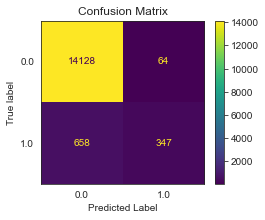

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     14192
         1.0       0.84      0.35      0.49      1005

    accuracy                           0.95     15197
   macro avg       0.90      0.67      0.73     15197
weighted avg       0.95      0.95      0.94     15197

Accuracy Score on Trianing data for Naive Bayes Classifier is: 95.31807787849375
Accuracy Score on Test data for Naive Bayes Classifier is: 95.24906231493058
F1 Score  for Naive Bayes Classifier is: 94.30126636108068


In [1085]:
print('The Report for Naive Bayes Model is: \n')
matrix = plot_confusion_matrix(nb_model, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(y_test, nb_predictts))

acc_score_nbtr = accuracy_score(y_train, nb_predicttr)
acc_score_nbts = accuracy_score(y_test, nb_predictts)
f1_score_nb = f1_score(y_test, nb_predictts, average="weighted")

print("Accuracy Score on Trianing data for Naive Bayes Classifier is: {}".format(acc_score_nbtr * 100))
print("Accuracy Score on Test data for Naive Bayes Classifier is: {}".format(acc_score_nbts * 100))
print("F1 Score  for Naive Bayes Classifier is: {}".format(f1_score_nb * 100))

<p style="font-family:Gadugi"> <mark>Observations from NB Model</mark>:

<p style="font-family:Gadugi">
1.   Accuracy:  A good accuracy score of 95.24% on the Test data. <br/>
2.   Recall: A recall value of 94.3%, which means among the total number of customers who default the loan, our model has predicted 0.943 of them correctly. <br/>
3.   Precision: A Precision value of 96%, which means out of customers who we predicted to default on the loan, only 96% of them actually default the loan.
<a name="m4"></a>

####  <p style="font-family:Gadugi">  <font color='green'>  M4) Random Forest Classifier

In [1086]:
rfmodel = RandomForestClassifier()

In [1087]:
rfmodel.fit(X_train, y_train)

<ipython-input-1087-2278c3bba290>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestClassifier()

<p style="font-family:Gadugi"> Prediction and Evaluation:

In [1088]:
rfmodel.score(X_train, y_train)

1.0

In [1089]:
rfmodel.score(X_test, y_test)

0.9822333355267487

In [1090]:
rf_predicttr = rfmodel.predict(X_train)

In [1091]:
rf_predictts = rfmodel.predict(X_test)

<p style="font-family:Gadugi">Assessment of the RF Model:

The Report for Random Forest Classifier Model is: 



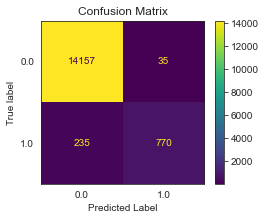

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14192
         1.0       0.96      0.77      0.85      1005

    accuracy                           0.98     15197
   macro avg       0.97      0.88      0.92     15197
weighted avg       0.98      0.98      0.98     15197

Accuracy Score on Training data for Random Forest Classifier is: 100.0
Accuracy Score on Test data for Random Forest Classifier is: 98.22333355267487
F1 Score  for Random Forest Classifier is: 98.13139078312196


In [1092]:
print('The Report for Random Forest Classifier Model is: \n')
matrix = plot_confusion_matrix(rfmodel, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(y_test, rf_predictts))

acc_score_rftr = accuracy_score(y_train, rf_predicttr)
acc_score_rfts = accuracy_score(y_test, rf_predictts)
f1_score_rf = f1_score(y_test, rf_predictts, average="weighted")

print("Accuracy Score on Training data for Random Forest Classifier is: {}".format(acc_score_rftr * 100))
print("Accuracy Score on Test data for Random Forest Classifier is: {}".format(acc_score_rfts * 100))
print("F1 Score  for Random Forest Classifier is: {}".format(f1_score_rf * 100))

<p style="font-family:Gadugi"> <mark>Observations from RF Model</mark>:

<p style="font-family:Gadugi">
1.   Accuracy:  A very good accuracy score of 98.22% on the Test data. <br/>
2.   Recall: A recall value of 98.13%, which means among the total number of customers who default the loan, our model has predicted 0.98 of them correctly. <br/>
3.   Precision: A Precision value of 98%, which means out of customers who we predicted to default on the loan, almost 98% of them actually default the loan.
    
<a name="m5"></a>

####   <p style="font-family:Gadugi"><font color='green'>  M5) Decision Tree Classifier

In [1093]:
dtmodel = DecisionTreeClassifier()

In [1094]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

<p style="font-family:Gadugi"> Prediction and Evaluation:

In [1095]:
dtmodel.score(X_train, y_train)

1.0

In [1096]:
dtmodel.score(X_test, y_test)

0.9713759294597618

In [1097]:
dt_predicttr = dtmodel.predict(X_train)

In [1098]:
dt_predictts = dtmodel.predict(X_test)

<p style="font-family:Gadugi">Assessment of the DT Model:

The Report for Decision Tree Classifier Model is: 



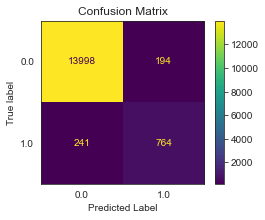

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     14192
         1.0       0.80      0.76      0.78      1005

    accuracy                           0.97     15197
   macro avg       0.89      0.87      0.88     15197
weighted avg       0.97      0.97      0.97     15197

Accuracy Score on Training data for  Decision Tree Classifier is: 100.0
Accuracy Score on Test data for  Decision Tree Classifier is: 97.13759294597618
F1 Score  for Decision Tree Classifier is: 97.10569167788763


In [1099]:
print('The Report for Decision Tree Classifier Model is: \n')
matrix = plot_confusion_matrix(dtmodel, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(y_test, dt_predictts))


print("Accuracy Score on Training data for  Decision Tree Classifier is: {}".format(accuracy_score(y_train, dt_predicttr) * 100))
print("Accuracy Score on Test data for  Decision Tree Classifier is: {}".format(accuracy_score(y_test, dt_predictts) * 100))
print("F1 Score  for Decision Tree Classifier is: {}".format(f1_score(y_test, dt_predictts, average="weighted") * 100))

<p style="font-family:Gadugi"> <mark>Observations from DT Model</mark>:

<p style="font-family:Gadugi">
1.   Accuracy:  A very good accuracy score of 97.07% on the Test data. <br/>
2.   Recall: A recall value of 97.04%, which means among the total number of customers who default the loan, our model has predicted 0.97 of them correctly. <br/>
3.   Precision: A Precision value of 98%, which means out of customers who we predicted to default on the loan, 98% of them actually default the loan.
<a name="m6"></a>

#### <p style="font-family:Gadugi"><font color='green'>  M6) XGBoost

In [1100]:
xg = XGBClassifier(n_estimators=500,learning_rate=0.1,use_label_encoder=False)

In [1101]:
xg.fit(X_train,y_train)

[22:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<p style="font-family:Gadugi"> Prediction and Evaluation:

In [1102]:
xg.score(X_train, y_train)

0.9913797357987728

In [1103]:
xg.score(X_test, y_test)

0.9823649404487728

In [1104]:
xg_predicttr = xg.predict(X_train)

In [1105]:
xg_predictts = xg.predict(X_test)

<p style="font-family:Gadugi">Assessment of the XGB Model:

The Report for XGBoost Classifier Model is: 



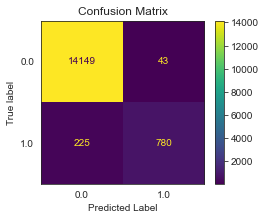

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14192
         1.0       0.95      0.78      0.85      1005

    accuracy                           0.98     15197
   macro avg       0.97      0.89      0.92     15197
weighted avg       0.98      0.98      0.98     15197

Accuracy Score on Training data for XGBoost Classifier is: 99.13797357987728
Accuracy Score on Test data for XGBoost Classifier is: 98.23649404487728
F1 Score  for XGBoost Classifier is: 98.15432246849419


In [1106]:
print('The Report for XGBoost Classifier Model is: \n')
matrix = plot_confusion_matrix(xg, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(y_test, xg_predictts))


print("Accuracy Score on Training data for XGBoost Classifier is: {}".format(accuracy_score(y_train, xg_predicttr) * 100))
print("Accuracy Score on Test data for XGBoost Classifier is: {}".format(accuracy_score(y_test, xg_predictts) * 100))
print("F1 Score  for XGBoost Classifier is: {}".format(f1_score(y_test, xg_predictts, average="weighted") * 100))

<p style="font-family:Gadugi"> <mark>Observations from XGB Model</mark>:

<p style="font-family:Gadugi">
1.   Accuracy:  A very good accuracy score of 98.23% on the Test data, best until now. <br/>
2.   Recall: A recall value of 98.15%, which means among the total number of customers who default the loan, our model has predicted 0.98 of them correctly. <br/>
3.   Precision: A Precision value of 96%, which means out of customers who we predicted to default on the loan, 98% of them actually default the loan.

---

<a name="p6roc"></a>

###  <mark> 6) Comparing Model performance using ROC & AUC </mark>

---
 <p style="font-family:Gadugi">
Let's use Receiver Operating Characteristic (ROC) curve and find the Area Under Curve (AUC) to evaluate the performance of our models with False postive ratio/True positive ratio.

In [1107]:
#Perform Predictions for all the models
PRED_PROB_LOG_RAW=logmodel.predict_proba(X_test)
PRED_PROB_KNN_RAW=knn_model.predict_proba(X_test)
PRED_PROB_NB_RAW=nb_model.predict_proba(X_test)
PRED_PROB_RF_RAW=rfmodel.predict_proba(X_test)
PRED_PROB_DT_RAW=dtmodel.predict_proba(X_test)
PRED_PROB_XG_RAW=xg.predict_proba(X_test)

In [1108]:
# Calculate fpr,tpr,threshold
fpr1, tpr1, thresh1 = roc_curve(y_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test, PRED_PROB_KNN_RAW[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test, PRED_PROB_NB_RAW[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test, PRED_PROB_RF_RAW[:,1], pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(y_test, PRED_PROB_DT_RAW[:,1], pos_label=1)
fpr6,tpr6,thresh6 = roc_curve(y_test, PRED_PROB_XG_RAW[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

AUC_LOG_RAW = roc_auc_score(y_test,PRED_PROB_LOG_RAW[:,1])
AUC_KNN_RAW=roc_auc_score(y_test,PRED_PROB_KNN_RAW[:,1])
AUC_NB_RAW=roc_auc_score(y_test,PRED_PROB_NB_RAW[:,1])
AUC_RF_RAW=roc_auc_score(y_test,PRED_PROB_RF_RAW[:,1])
AUC_DT_RAW=roc_auc_score(y_test,PRED_PROB_DT_RAW[:,1])
AUC_XG_RAW=roc_auc_score(y_test,PRED_PROB_XG_RAW[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW, AUC_KNN_RAW, AUC_NB_RAW, AUC_RF_RAW, AUC_DT_RAW, AUC_XG_RAW])

The ROC Curve and the Final Report card for the Main Data is here:


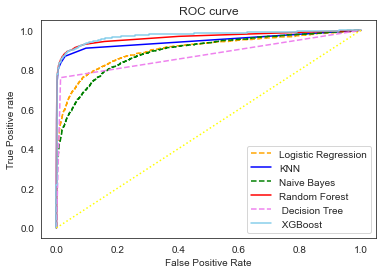

ROC_AUC_Score for Logistic Regression is: 0.9013765024931711
ROC_AUC_Score for KNN is: 0.946013941005233
ROC_AUC_Score for Naive Bayes is: 0.8901552693129616
ROC_AUC_Score for Random Forest is: 0.9650045292141323
ROC_AUC_Score for Decision Tree is: 0.873264665959941
ROC_AUC_Score for XGBoost is: 0.97371870915995
*******************************************************************
The Best ROC_AUC_Score is :0.97371870915995 for XGBoost Classifier


In [1109]:
#Plot Area Under Curve

plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes')
plt.plot(fpr4,tpr4,linestyle='solid',color='Red', label='Random Forest')
plt.plot(fpr5,tpr5,linestyle='--',color='violet',label=' Decision Tree')
plt.plot(fpr6,tpr6,linestyle='solid',color='skyblue',label=' XGBoost')

print('The ROC Curve and the Final Report card for the Main Data is here:')

plt.plot(p_fpr, p_tpr, linestyle=':', color='Yellow')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

print("ROC_AUC_Score for Logistic Regression is: {}".format(AUC_LOG_RAW))
print("ROC_AUC_Score for KNN is: {}".format(AUC_KNN_RAW))
print("ROC_AUC_Score for Naive Bayes is: {}".format(AUC_NB_RAW))
print("ROC_AUC_Score for Random Forest is: {}".format(AUC_RF_RAW))
print("ROC_AUC_Score for Decision Tree is: {}".format(AUC_DT_RAW))
print("ROC_AUC_Score for XGBoost is: {}".format(AUC_XG_RAW))

print("*******************************************************************")

d = {'Logistice Regression': AUC_LOG_RAW, 'KNN': AUC_KNN_RAW, 'Naive Bayes': AUC_NB_RAW, 'Decision Trees': AUC_DT_RAW, 
      'Random Forest': AUC_RF_RAW, 'XGBoost': AUC_XG_RAW}
l = list(d.values())
for i in list(d.keys()):
    if d[i] == AUC_SCORES.max():
        ROC_AUC_Model = i

print("The Best ROC_AUC_Score is :{} for {} Classifier".format(AUC_SCORES.max(), ROC_AUC_Model))

 <p style="font-family:Gadugi"><mark>Observation</mark>:

<p style="font-family:Gadugi">
ROC curve is plotted with TPR (Y-axis) against the FPR (X-axis).
<p style="font-family:Gadugi">
ROC is a probability curve and AUC represents degree or measure of separability. Higher the AUC, better is our model at distinguishing between a customer buying the personal Loan and not buying Personal Loan.

 <p style="font-family:Gadugi"><mark><b>Conclusion</b></mark>:
<p style="font-family:Gadugi">
Now, The XGBoost Classifier Model has the highest AUC score, so does the ROC curve too.
<p style="font-family:Gadugi">
By checking the Accuracy, Precision, Recall, ROC & AUC; the <b>Random Forest</b> Classifier Model appears to be the best model for this classification problem. 

---

<p style="font-family:Gadugi">
Now, even though we have got a good accuracy score of 98.3%, our dataset is highly imbalanced.
<p style="font-family:Gadugi">
We have already performed 'Upsampling'. We will apply the same models on the upsampled dataset as well.

---
<a name="p7us"></a>

### <mark> 6US) Model Building on Upsampled Dataset </mark> *(US denotes 'Upsampled')*
<a name="m1us"></a>

#### <p style="font-family:Gadugi"> <font color='brown'> M1US) Logistic Regression Model  

In [1110]:
logmodelus = LogisticRegression();
logmodelus.fit(X_upsampled_train, Y_upsampled_train);

C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<p style="font-family:Gadugi"> Prediction and Evaluation

In [1111]:
logmodelus.score(X_upsampled_train, Y_upsampled_train)

0.8369475223281132

In [1112]:
logmodelus.score(X_upsampled_test, Y_upsampled_test)

0.8362810033821871

In [1113]:
logmodelus_predicttr = logmodelus.predict(X_upsampled_train)

In [1114]:
logmodelus_predictts = logmodelus.predict(X_upsampled_test)

<p style="font-family:Gadugi">Assessment of the LR Model:

The Report for Logistic Regression Model on the Upsampled Data is: 



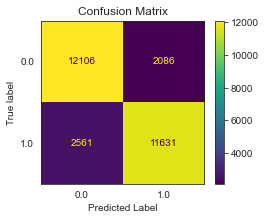

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84     14192
         1.0       0.85      0.82      0.83     14192

    accuracy                           0.84     28384
   macro avg       0.84      0.84      0.84     28384
weighted avg       0.84      0.84      0.84     28384

Accuracy Score on Trianing data for Logistic Regression is: 83.69475223281133
Accuracy Score on Test data for Logistic Regression is: 83.62810033821872
F1 Score  for Logistic Regression is: 83.34945716435558


In [1115]:
print('The Report for Logistic Regression Model on the Upsampled Data is: \n')
matrix = plot_confusion_matrix(logmodelus,X_upsampled_test, Y_upsampled_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(Y_upsampled_test, logmodelus_predictts))

acc_scoreustr = accuracy_score(Y_upsampled_train, logmodelus_predicttr)
acc_scoreusts = accuracy_score(Y_upsampled_test, logmodelus_predictts)
f1_scoreus = f1_score(Y_upsampled_test, logmodelus_predictts)

print("Accuracy Score on Trianing data for Logistic Regression is: {}".format(acc_scoreustr * 100))
print("Accuracy Score on Test data for Logistic Regression is: {}".format(acc_scoreusts * 100))
print("F1 Score  for Logistic Regression is: {}".format(f1_scoreus * 100))

#### <p style="font-family:Gadugi"> <font color='brown'> M2US) K-Nearest Neighbours (KNN) Model

In [1116]:
knn_modelus = KNeighborsClassifier(n_neighbors=15)

In [1117]:
knn_modelus.fit(X_upsampled_train,Y_upsampled_train)

<ipython-input-1117-d44b396e9214>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_modelus.fit(X_upsampled_train,Y_upsampled_train)


KNeighborsClassifier(n_neighbors=15)

<p style="font-family:Gadugi"> Prediction and Evaluation:

In [1118]:
knn_modelus.score(X_upsampled_train, Y_upsampled_train)

0.9685028273468741

In [1119]:
knn_modelus.score(X_upsampled_test, Y_upsampled_test)

0.9620208568207441

In [1120]:
knn_predictustr = knn_modelus.predict(X_upsampled_train)

In [1121]:
knn_predictusts = knn_modelus.predict(X_upsampled_test)

<p style="font-family:Gadugi">Assessment of the KNN Model:

The Report for KNN Classifier Model on the Upsampled Data is: 



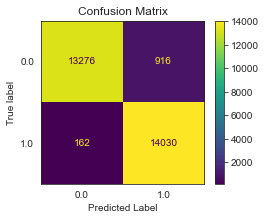

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     14192
         1.0       0.94      0.99      0.96     14192

    accuracy                           0.96     28384
   macro avg       0.96      0.96      0.96     28384
weighted avg       0.96      0.96      0.96     28384

Accuracy Score on Training data for KNN Classifier is: 96.85028273468741
Accuracy Score on Tests data for KNN Classifier is: 96.20208568207441
F1 Score for KNN Classifier is: 96.30036378612122


In [1122]:
print('The Report for KNN Classifier Model on the Upsampled Data is: \n')
matrix = plot_confusion_matrix(knn_modelus, X_upsampled_test, Y_upsampled_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()


print(classification_report(Y_upsampled_test, knn_predictusts))


print("Accuracy Score on Training data for KNN Classifier is: {}".format(accuracy_score(Y_upsampled_train, knn_predictustr) * 100))
print("Accuracy Score on Tests data for KNN Classifier is: {}".format(accuracy_score(Y_upsampled_test, knn_predictusts) * 100))
print("F1 Score for KNN Classifier is: {}".format(f1_score(Y_upsampled_test, knn_predictusts) * 100))

#### <p style="font-family:Gadugi"> <font color='brown'> M3US) Naive Bayes Model

In [1123]:
nb_modelus = GaussianNB()

In [1124]:
nb_modelus.fit(X_upsampled_train, Y_upsampled_train);

C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<p style="font-family:Gadugi"> Prediction and Evaluation

In [1125]:
nb_modelus.score(X_upsampled_train, Y_upsampled_train)

0.8174291401694647

In [1126]:
nb_modelus.score(X_upsampled_test, Y_upsampled_test)

0.818630214205186

In [1127]:
nb_predictustr = nb_modelus.predict(X_upsampled_train)

In [1128]:
nb_predictusts = nb_modelus.predict(X_upsampled_test)

<p style="font-family:Gadugi">Assessment of the NB Model:

The Report for Naive Bayes Model on the Upsampled Data is: 



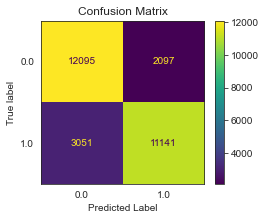

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82     14192
         1.0       0.84      0.79      0.81     14192

    accuracy                           0.82     28384
   macro avg       0.82      0.82      0.82     28384
weighted avg       0.82      0.82      0.82     28384

Accuracy Score on Training data for Naive Bayes Model is: 81.74291401694647
Accuracy Score on Test data for Naive Bayes Model is: 81.8630214205186
F1 Score for Naive Bayes Model is: 81.23222748815165


In [1129]:
print('The Report for Naive Bayes Model on the Upsampled Data is: \n')
matrix = plot_confusion_matrix(nb_modelus, X_upsampled_test, Y_upsampled_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()


print(classification_report(Y_upsampled_test, nb_predictusts))

acc_score_nbustr = accuracy_score(Y_upsampled_train, nb_predictustr)
acc_score_nbusts = accuracy_score(Y_upsampled_test, nb_predictusts)
f1_score_nbus = f1_score(Y_upsampled_test, nb_predictusts)

print("Accuracy Score on Training data for Naive Bayes Model is: {}".format(acc_score_nbustr * 100))
print("Accuracy Score on Test data for Naive Bayes Model is: {}".format(acc_score_nbusts * 100))
print("F1 Score for Naive Bayes Model is: {}".format(f1_score_nbus * 100))

#### <p style="font-family:Gadugi"> <font color='brown'> M4US) Random Forest Classifier

In [1130]:
rfmodelus = RandomForestClassifier()

In [1131]:
rfmodelus.fit(X_upsampled_train, Y_upsampled_train)

<ipython-input-1131-0accafd85226>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodelus.fit(X_upsampled_train, Y_upsampled_train)


RandomForestClassifier()

<p style="font-family:Gadugi"> Prediction and Evaluation

In [1132]:
rfmodelus.score(X_upsampled_train, Y_upsampled_train)

1.0

In [1133]:
rfmodelus.score(X_upsampled_test, Y_upsampled_test)

0.9968996617812852

In [1134]:
rf_predictustr = rfmodelus.predict(X_upsampled_train)

In [1135]:
rf_predictusts = rfmodelus.predict(X_upsampled_test)

<p style="font-family:Gadugi">Assessment of the RF Model:

The Report for Random Forest Model on the Upsampled Data is: 



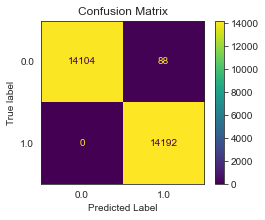

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     14192
         1.0       0.99      1.00      1.00     14192

    accuracy                           1.00     28384
   macro avg       1.00      1.00      1.00     28384
weighted avg       1.00      1.00      1.00     28384

Accuracy Score on Training data for Random Forest Classifier is: 100.0
Accuracy Score on Test data for Random Forest Classifier is: 99.68996617812851
F1 Score  for Random Forest Classifier is: 99.69092441697106


In [1136]:
print('The Report for Random Forest Model on the Upsampled Data is: \n')
matrix = plot_confusion_matrix(rfmodelus, X_upsampled_test, Y_upsampled_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()

print(classification_report(Y_upsampled_test, rf_predictusts))

acc_score_rfustr = accuracy_score(Y_upsampled_train, rf_predictustr)
acc_score_rfusts = accuracy_score(Y_upsampled_test, rf_predictusts)
f1_score_rfus = f1_score(Y_upsampled_test, rf_predictusts)

print("Accuracy Score on Training data for Random Forest Classifier is: {}".format(acc_score_rfustr * 100))
print("Accuracy Score on Test data for Random Forest Classifier is: {}".format(acc_score_rfusts * 100))
print("F1 Score  for Random Forest Classifier is: {}".format(f1_score_rfus * 100))

#### <p style="font-family:Gadugi"> <font color='brown'> M5US) Decision Tree Classifier

In [1137]:
dtmodelus = DecisionTreeClassifier()

In [1138]:
dtmodelus.fit(X_upsampled_train, Y_upsampled_train)

DecisionTreeClassifier()

<p style="font-family:Gadugi"> Prediction and Evaluation

In [1139]:
dtmodelus.score(X_upsampled_train, Y_upsampled_train)

1.0

In [1140]:
dtmodelus.score(X_upsampled_test, Y_upsampled_test)

0.9917559188275085

In [1141]:
dt_predictustr = dtmodelus.predict(X_upsampled_train)

In [1142]:
dt_predictusts = dtmodelus.predict(X_upsampled_test)

<p style="font-family:Gadugi">Assessment of the DT Model:

The Report for Decision Tree Classifier Model on the Upsampled Data is: 



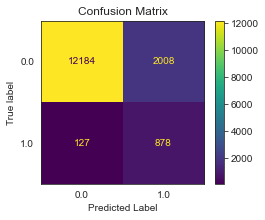

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     14192
         1.0       0.98      1.00      0.99     14192

    accuracy                           0.99     28384
   macro avg       0.99      0.99      0.99     28384
weighted avg       0.99      0.99      0.99     28384

Accuracy Score on Training data for Decision Tree Classifier is: 100.0
Accuracy Score on Test data for Decision Tree Classifier is: 99.17559188275085
F1 Score for Decision Tree Classifier is: 99.18233279754001


In [1143]:
print('The Report for Decision Tree Classifier Model on the Upsampled Data is: \n')
matrix = plot_confusion_matrix(dtmodelus, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()


print(classification_report(Y_upsampled_test, dt_predictusts))


print("Accuracy Score on Training data for Decision Tree Classifier is: {}".format(accuracy_score(Y_upsampled_train, dt_predictustr)* 100))
print("Accuracy Score on Test data for Decision Tree Classifier is: {}".format(accuracy_score(Y_upsampled_test, dt_predictusts)* 100))
print("F1 Score for Decision Tree Classifier is: {}".format(f1_score(Y_upsampled_test, dt_predictusts)* 100))

#### <p style="font-family:Gadugi"> <font color='brown'> M6US) XG Boost

In [1144]:
xgmodelus = XGBClassifier()

In [1145]:
xgmodelus.fit(X_upsampled_train, Y_upsampled_train)

C:\Users\Hrishikesh\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Hrishikesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<p style="font-family:Gadugi"> Prediction and Evaluation

In [1146]:
xgmodelus.score(X_upsampled_train, Y_upsampled_train)

0.9837493614247714

In [1147]:
xgmodelus.score(X_upsampled_test, Y_upsampled_test)

0.9799534949267192

In [1148]:
xg_predictustr = xgmodelus.predict(X_upsampled_train)

In [1149]:
xg_predictusts = xgmodelus.predict(X_upsampled_test)

<p style="font-family:Gadugi">Assessment of the XGB Model:

The Report for XG Boost Classifier Model on the Upsampled Data is: 



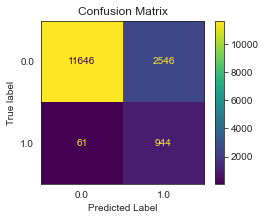

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     14192
         1.0       0.98      0.98      0.98     14192

    accuracy                           0.98     28384
   macro avg       0.98      0.98      0.98     28384
weighted avg       0.98      0.98      0.98     28384

Accuracy Score on Training data for XG Boost Classifier Classifier is: 98.37493614247714
Accuracy Score on Test data for XG Boost Classifier Classifier is: 97.99534949267192
F1 Score for XG Boost Classifier is: 98.00077298759705


In [1150]:
print('The Report for XG Boost Classifier Model on the Upsampled Data is: \n')
matrix = plot_confusion_matrix(xgmodelus, X_test, y_test, values_format='d')
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().set_size_inches(4,3)
plt.show()


print(classification_report(Y_upsampled_test, xg_predictusts))


print("Accuracy Score on Training data for XG Boost Classifier Classifier is: {}".format(accuracy_score(Y_upsampled_train, xg_predictustr)* 100))
print("Accuracy Score on Test data for XG Boost Classifier Classifier is: {}".format(accuracy_score(Y_upsampled_test, xg_predictusts)* 100))
print("F1 Score for XG Boost Classifier is: {}".format(f1_score(Y_upsampled_test, xg_predictusts)* 100))


### <mark> 7US) Comparing Model performance using ROC & AUC</mark>
---

<p style="font-family:Gadugi">
Let's use Receiver Operating Characteristic (ROC) curve and find the Area Under Curve (AUC) to evaluate the performance of our models with False postive ratio/True positive ratio.
    
<a name="p7roc"></a>

In [1151]:
#Perform Predictions for all the models
PRED_PROB_LOG_RAW=logmodelus.predict_proba(X_upsampled_test)
PRED_PROB_KNN_RAW=knn_modelus.predict_proba(X_upsampled_test)
PRED_PROB_NB_RAW=nb_modelus.predict_proba(X_upsampled_test)
PRED_PROB_RF_RAW=rfmodelus.predict_proba(X_upsampled_test)
PRED_PROB_DT_RAW=dtmodelus.predict_proba(X_upsampled_test)
PRED_PROB_XG_RAW=xgmodelus.predict_proba(X_upsampled_test)

In [1152]:
#calculate fpr,tpr,threshold
fpr1, tpr1, thresh1 = roc_curve(Y_upsampled_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(Y_upsampled_test, PRED_PROB_KNN_RAW[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(Y_upsampled_test, PRED_PROB_NB_RAW[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(Y_upsampled_test, PRED_PROB_RF_RAW[:,1], pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(Y_upsampled_test, PRED_PROB_DT_RAW[:,1], pos_label=1)
fpr6,tpr6,thresh6 = roc_curve(Y_upsampled_test, PRED_PROB_XG_RAW[:,1], pos_label=1)

random_probs = [0 for i in range(len(Y_upsampled_test))]
p_fpr, p_tpr, _ = roc_curve(Y_upsampled_test, random_probs, pos_label=1)


AUC_LOG_RAW = roc_auc_score(Y_upsampled_test,PRED_PROB_LOG_RAW[:,1])
AUC_KNN_RAW = roc_auc_score(Y_upsampled_test,PRED_PROB_KNN_RAW[:,1])
AUC_NB_RAW = roc_auc_score(Y_upsampled_test,PRED_PROB_NB_RAW[:,1])
AUC_RF_RAW = roc_auc_score(Y_upsampled_test,PRED_PROB_RF_RAW[:,1])
AUC_DT_RAW = roc_auc_score(Y_upsampled_test,PRED_PROB_DT_RAW[:,1])
AUC_XG_RAW = roc_auc_score(Y_upsampled_test,PRED_PROB_XG_RAW[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW, AUC_KNN_RAW, AUC_NB_RAW, AUC_RF_RAW, AUC_DT_RAW, AUC_XG_RAW])

The ROC Curve and the Final Report card for the Upsampled Data is here:


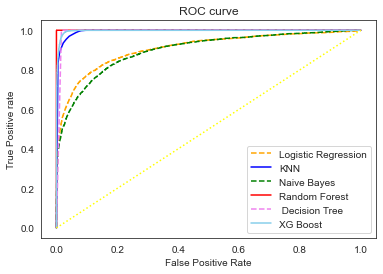

ROC_AUC_Score for Logistic Regression is: 0.908120948024452
ROC_AUC_Score for KNN is: 0.993781834610127
ROC_AUC_Score for Naive Bayes is: 0.8981291929794514
ROC_AUC_Score for Random Forest is: 0.9999629417910466
ROC_AUC_Score for Decision Tree is: 0.9917559188275085
ROC_AUC_Score for XG Boost is: 0.9973886747372799
*******************************************************************
The Best ROC_AUC_Score is :0.9999629417910466 for Random Forest Classifier


In [1153]:
#Plot Area Under Curve

plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes')
plt.plot(fpr4,tpr4,linestyle='solid',color='Red', label='Random Forest')
plt.plot(fpr5,tpr5,linestyle='--',color='violet',label=' Decision Tree')
plt.plot(fpr6,tpr6,linestyle='solid',color='skyblue',label='XG Boost')

print('The ROC Curve and the Final Report card for the Upsampled Data is here:')

plt.plot(p_fpr, p_tpr, linestyle=':', color='Yellow')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

print("ROC_AUC_Score for Logistic Regression is: {}".format(AUC_LOG_RAW))
print("ROC_AUC_Score for KNN is: {}".format(AUC_KNN_RAW))
print("ROC_AUC_Score for Naive Bayes is: {}".format(AUC_NB_RAW))
print("ROC_AUC_Score for Random Forest is: {}".format(AUC_RF_RAW))
print("ROC_AUC_Score for Decision Tree is: {}".format(AUC_DT_RAW))
print("ROC_AUC_Score for XG Boost is: {}".format(AUC_XG_RAW))

print("*******************************************************************")

d = {'Logistice Regression': AUC_LOG_RAW, 'KNN': AUC_KNN_RAW, 'Naive Bayes': AUC_NB_RAW, 'Decision Trees': AUC_DT_RAW, 
      'Random Forest': AUC_RF_RAW, 'XGBoost': AUC_XG_RAW}
l = list(d.values())
for i in list(d.keys()):
    if d[i] == AUC_SCORES.max():
        ROC_AUC_Model = i

print("The Best ROC_AUC_Score is :{} for {} Classifier".format(AUC_SCORES.max(), ROC_AUC_Model))

 <p style="font-family:Gadugi"><mark><b>Conclusion</b></mark>:
<p style="font-family:Gadugi">
Now, The Random Forest Classifier Model has the highest AUC score, so does the ROC curve too.
<p style="font-family:Gadugi">
By checking the Accuracy, Precision, Recall, ROC & AUC; the <b>Random Forest</b> Classifier Model appears to be the best model on the Upsampled dataset as well. 

---
<a name="p8"></a>

### <mark> 8) Exporting the y_pred using Random Forest Classifier: </mark>

In [1177]:
# We first import the test_X file
# Reading and converting the dataset to Pandas DataFrame
dc = pd.read_csv('test_X.csv')
dft = pd.DataFrame(dc)

In [1178]:
# Check if we have correctly imported the data
dft.head()

,ID_Test,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1780.356350,16691.51975,B,X,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,2,1939.547945,14782.20015,A,Z,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,3,1721.876977,14035.40923,B,Z,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,4,1681.268538,15179.79116,A,Z,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,5,1654.495928,15187.09603,A,Y,0,0.272479,178.429450,4.571414,600.006307,3379.363201


--- 
<a name="datasummary"></a>

###  <font color='red'> <mark>  8.1) Data Summary: </font>



<font style="font-family:Gadugi"> Checking brief information, datatypes in our columns and all other summary

In [1179]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Test          20000 non-null  int64  
 1   Expense          20000 non-null  float64
 2   Income           20000 non-null  float64
 3   Loan type        20000 non-null  object 
 4   Occupation type  20000 non-null  object 
 5   Age              20000 non-null  int64  
 6   Score1           20000 non-null  float64
 7   Score2           20000 non-null  float64
 8   Score3           20000 non-null  float64
 9   Score4           20000 non-null  float64
 10  Score5           20000 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


<font style="font-family:Gadugi"> We can observe that there are no missing values in the dataset.

In [1180]:
# To avoid the inconvenience, lowercase all the column labels
dft.columns = [i.lower() for i in dft.columns]
dft.columns

Index(['id_test', 'expense', 'income', 'loan type', 'occupation type', 'age',
       'score1', 'score2', 'score3', 'score4', 'score5'],
      dtype='object')

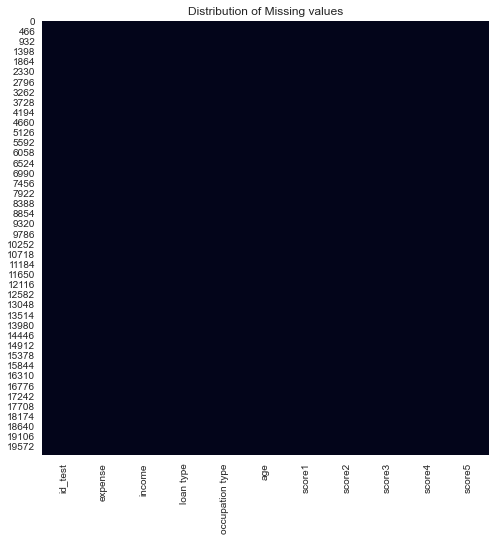

In [1181]:
# Here, we check the distribution of missing values.
# In the plot below, the white lines represent missing values while black areas have non-null values.

plt.figure(figsize=(8,8))
sns.heatmap(dft.isnull(), cbar=False)
plt.title('Distribution of Missing values')
plt.show()

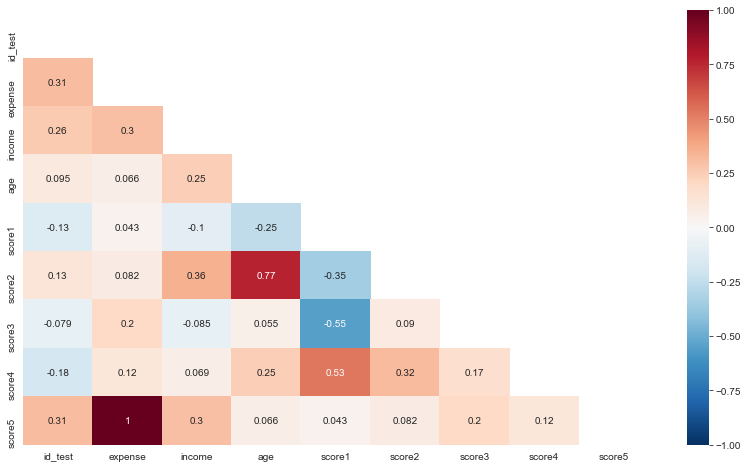

In [1182]:
# The Correlation Matrix
plt.figure(figsize=(14,8))
mask = np.triu(np.ones_like(dft.corr(), dtype=bool))
sns.heatmap(dft.corr(), annot=True, vmin=-1,vmax=1,center=0, mask=mask, cmap='RdBu_r');

<p style="font-family:Gadugi"> <mark>Observation</mark>: The feature score5 has very strong correlation with the 'expense' feature as well as score 3 and hence shall be reomved before modelling..  <br/>

In [1183]:
# We drop two features: score4 and score5
dft.drop(['score4', 'score5'], axis=1, inplace=True)
dft.columns

Index(['id_test', 'expense', 'income', 'loan type', 'occupation type', 'age',
       'score1', 'score2', 'score3'],
      dtype='object')

In [1184]:
# # Setting ID column as the Index column since it will not affect the Model prediction
dft.set_index(['id_test'], inplace=True)
dft.head()

,expense,income,loan type,occupation type,age,score1,score2,score3
id_test,,,,,,,,
1,1780.356350,16691.51975,B,X,1,0.348808,226.896383,12.506668
2,1939.547945,14782.20015,A,Z,0,0.426270,125.046903,12.976712
3,1721.876977,14035.40923,B,Z,0,0.097577,181.636946,5.501962
4,1681.268538,15179.79116,A,Z,0,0.295460,151.320572,3.058352
5,1654.495928,15187.09603,A,Y,0,0.272479,178.429450,4.571414


###  <mark >  8.2) Dummy Coding </mark>

<font style="font-family:Gadugi"> We replace the object type values with numerical ones.

In [1185]:
# Dummy coding applied on the 'loan type' feature
dummies = pd.get_dummies(dft['loan type'])
dft = dft.join(dummies)
dft.drop('loan type', axis=1, inplace=True)
dft.head()

,expense,income,occupation type,age,score1,score2,score3,A,B
id_test,,,,,,,,,
1,1780.356350,16691.51975,X,1,0.348808,226.896383,12.506668,0,1
2,1939.547945,14782.20015,Z,0,0.426270,125.046903,12.976712,1,0
3,1721.876977,14035.40923,Z,0,0.097577,181.636946,5.501962,0,1
4,1681.268538,15179.79116,Z,0,0.295460,151.320572,3.058352,1,0
5,1654.495928,15187.09603,Y,0,0.272479,178.429450,4.571414,1,0


In [1186]:
# Dummy coding applied on the 'occupation type' feature
dummies = pd.get_dummies(dft['occupation type'])
dft = dft.join(dummies)
dft.drop('occupation type', axis=1, inplace=True)
dft.head()

,expense,income,age,score1,score2,score3,A,B,X,Y,Z
id_test,,,,,,,,,,,
1,1780.356350,16691.51975,1,0.348808,226.896383,12.506668,0,1,1,0,0
2,1939.547945,14782.20015,0,0.426270,125.046903,12.976712,1,0,0,0,1
3,1721.876977,14035.40923,0,0.097577,181.636946,5.501962,0,1,0,0,1
4,1681.268538,15179.79116,0,0.295460,151.320572,3.058352,1,0,0,0,1
5,1654.495928,15187.09603,0,0.272479,178.429450,4.571414,1,0,0,1,0


In [1187]:
X_test = pd.DataFrame(dft)

# We will train on the entire training dataset this time, without splitting
X_train_final = df.loc[:, df.columns != "label"]
Y_train_final = df[['label']]

<p style="font-family:Gadugi">Now let's perform <mark><b>'Standardization'</b></mark> on our Dataset to increase our learning performance.
A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

In [1188]:
ssf = StandardScaler().fit(X_train_final)
X_train_final = ssf.transform(X_train_final)
X_test = ss.transform(X_test)

---
<a name="p4"></a>

### <mark color='blue'> 8.3) Model Building </mark>

####  <p style="font-family:Gadugi">  <font color='green'> Random Forest Classifier

In [1190]:
rfmodel = RandomForestClassifier()

In [1192]:
rfmodel.fit(X_train_final, Y_train_final)

<ipython-input-1192-9364836b8c24>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train_final, Y_train_final)


RandomForestClassifier()

<p style="font-family:Gadugi"> Prediction and Evaluation:

In [1193]:
rfmodel.score(X_train_final, Y_train_final)

0.9999736786691935

In [1194]:
# Getting the final predictions
y_pred = rfmodel.predict(X_test)

In [1198]:
# Exporting to CSV file
pd.DataFrame(y_pred).to_csv('MS4610 Group 19 y_pred.csv', index=False)

### <mark> 9) Final Conclusion for the Project: </mark> <a name="p9"></a>
---

<p style="font-family:Gadugi">
    i)   The given data was assessed using a thorough Exploratory Data Analysis.<br/>
    ii)  For each of the features, Skewness and Outlier Analysis was performed.<br/>
    iii) Our target column had high imbalance which would result into a biased model. Upsampling technique was used to mitigate this issue.<br/>
    iv)  Standardization was performed to increase the learning performance of the model.<br/>
    v)   A total of 6 models were tested on the main original data as well as the upsampled data.<br/>
    vi)  The <b>Random Forest Classifier</b> is the best Model for the classification purpose. <br/> <br/>
    Some of the <b>Recommendations</b> to avoid loans from going default:<br/>
    a) Rolling out loan type 'A' for customers with higher annual income seems risky.<br/>
    b) Focus more on customers aged above 50 which have better financial stability.<br/>
    c) Ensure to carefully handle customers with higher annual income as well as occupation type 'X' since they have greater risk of defaulting the loan.<br/>
    d) Customers belonging to occupation type Z and having high expenses, are more likely to default on loan. So, its advisable to focus on these people. <br/>
    e) Focus more on customers whose occupation type is X and have low 'score4' value.<br/>
    f) Having lesser amount of missing values would have helped for a better analysis.<br/>

<center>  --Thank You!--